In [1]:
# Currently only set up to download North American events - copy script to get Turkey ones

In [2]:
from obspy.core import Stream, UTCDateTime
from obspy.clients.fdsn import Client
import numpy as np
import pandas as pd
import os.path
import os

In [3]:
# Naming the client where the data will be coming from. Googling obspy fdsn will
# list other options.

client = Client('IRIS')

# Reading in my info files - earthquakes is a list of the events I want to get data for,
# which includes locations and origin times, and then stas is the list of stations I want
# to pull data from. Chans is then the four strainmeter channels for these instruments.

earthquakes = pd.read_csv('/Users/sydneydybing/StrainProject/2024/extra_2004-2009_cat.csv', dtype = str)
bsm_mda = pd.read_csv('/Users/sydneydybing/StrainProject/2024/bsm_metadata.csv')
NA_only = bsm_mda.loc[bsm_mda['LONG'] < -110]
stas = NA_only['BNUM'].values
chans = ['BS1', 'BS2', 'BS3', 'BS4']

In [7]:
# Extra data can be downloaded for these three and 
# https://earthquake.usgs.gov/earthquakes/eventpage/us200028ue/executive

earthquakes.iloc[[1,2,3]]

time latitude longitude depth  mag magType  nst   gap  \
1  2008-01-09T14:40:00.960Z   51.649  -131.183    10  6.1     mwc  333  78.3   
2  2008-01-05T11:44:48.170Z   51.163  -130.542    10  6.4     mwc  462  42.7   
3  2008-01-05T11:01:06.110Z   51.254  -130.746    15  6.6     mwc  422  66.7   

  dmin   rms  ...                   updated  \
1  NaN  1.01  ...  2022-05-02T20:57:41.715Z   
2  NaN  1.15  ...  2022-05-02T20:56:54.859Z   
3  NaN  1.29  ...  2022-07-13T23:12:43.217Z   

                                place        type horizontalError depthError  \
1          Haida Gwaii Region, Canada  earthquake             NaN          0   
2  251 km WNW of Port McNeill, Canada  earthquake             NaN        NaN   
3  267 km WNW of Port McNeill, Canada  earthquake             NaN        NaN   

  magError magNst    status locationSource magSource  
1      NaN    NaN  reviewed             us        us  
2      NaN    NaN  reviewed             us        us  
3      NaN    NaN  reviewed             us      gcmt  

[3 rows x 22 columns]

In [5]:
# This method of reading in data from IRIS uses origin times in the UTCDateTime format.
# To get the origin times from my earthquakes file in this format, since in the CSV each
# time unit is a separate column, I pulled each time unit out into its own variable.

origin_times = earthquakes.time.values
mags = earthquakes.mag.values

-----------------------------------------
Earthquake 1/8
2008-01-10T01:37:19.000Z
B001


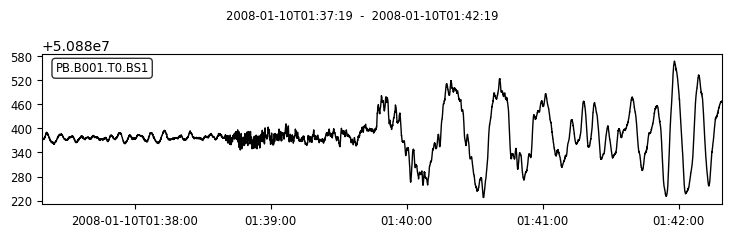

B003


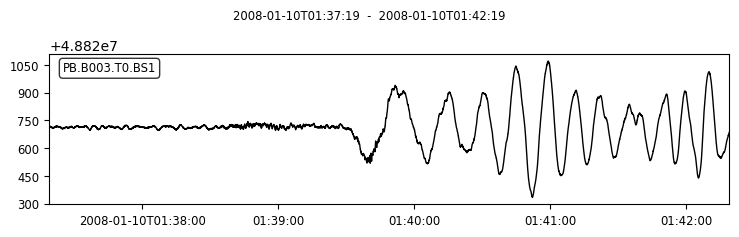

B004


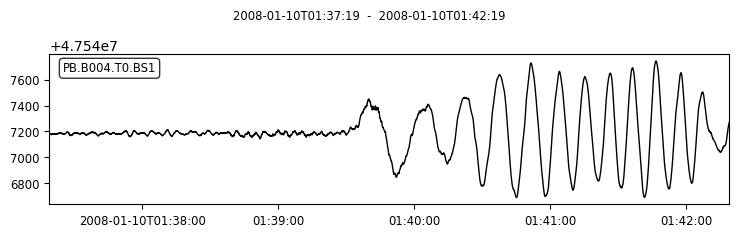

B005


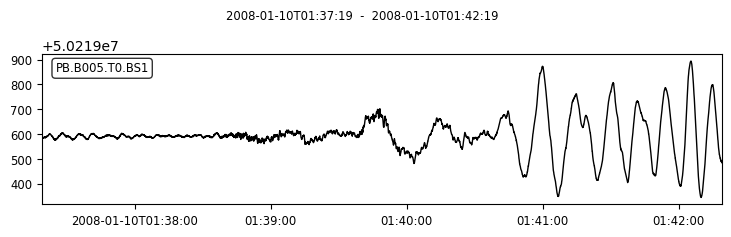

B006


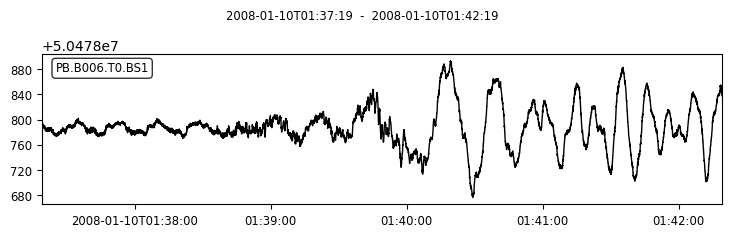

B007


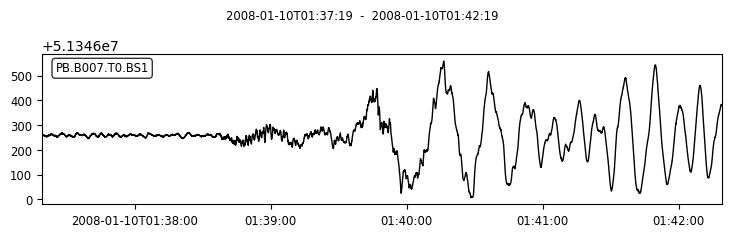

B009


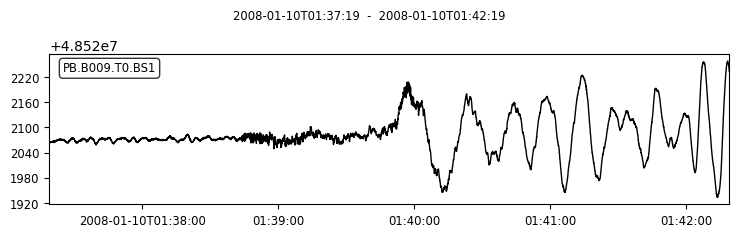

B010


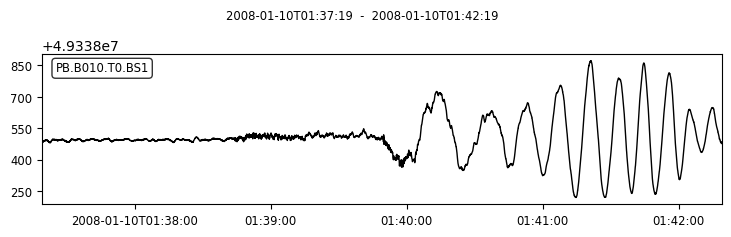

B011


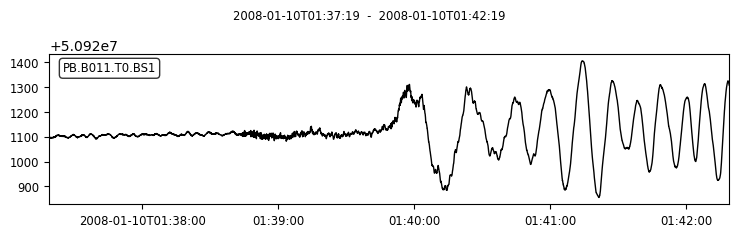

B012


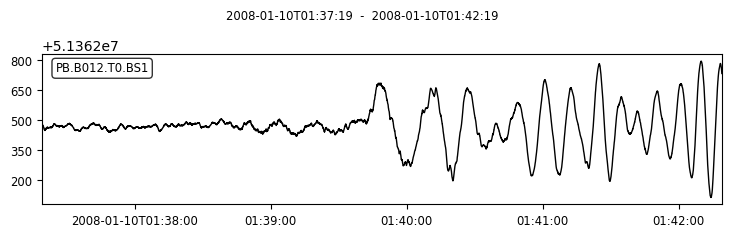

B013


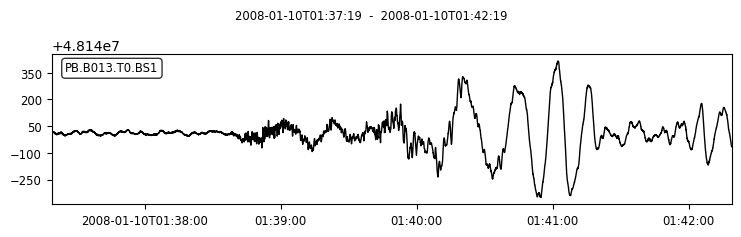

B014
0 B014 BS1 not found
0 B014 BS2 not found
0 B014 BS3 not found
0 B014 BS4 not found
B017


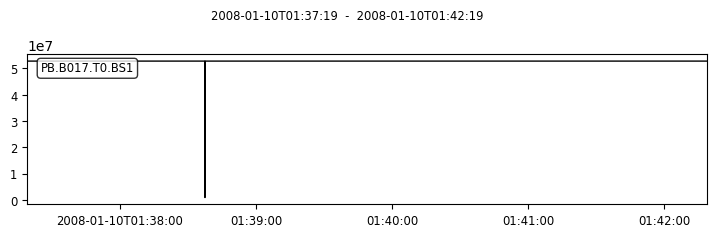

B018


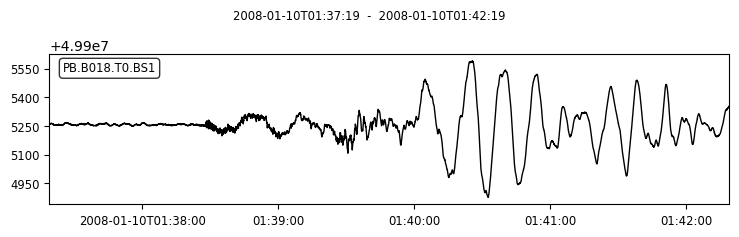

B019
0 B019 BS1 not found
0 B019 BS2 not found
0 B019 BS3 not found
0 B019 BS4 not found
B020
0 B020 BS1 not found
0 B020 BS2 not found
0 B020 BS3 not found
0 B020 BS4 not found
B022


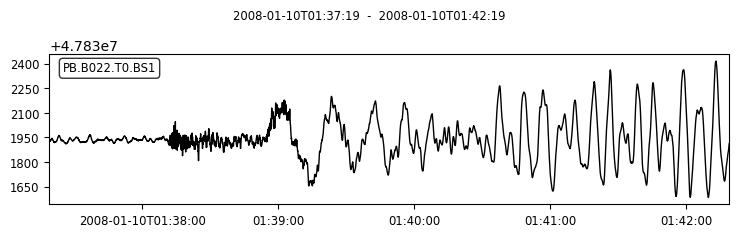

B023
0 B023 BS1 not found
0 B023 BS2 not found
0 B023 BS3 not found
0 B023 BS4 not found
B024
0 B024 BS1 not found
0 B024 BS2 not found
0 B024 BS3 not found
0 B024 BS4 not found
B026


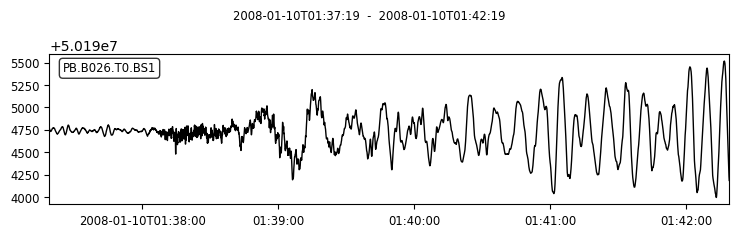

B027


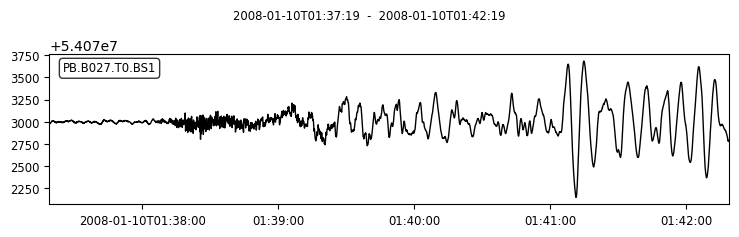

B028


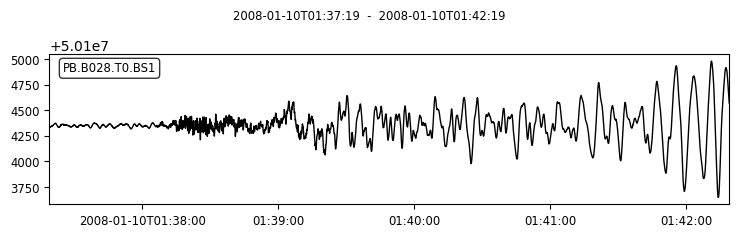

B030


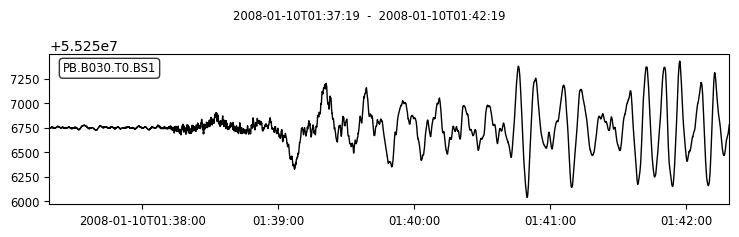

B031


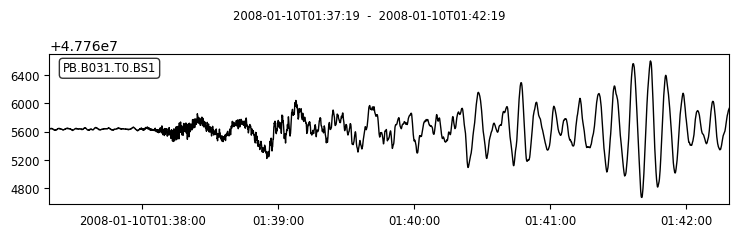

B032
0 B032 BS1 not found
0 B032 BS2 not found
0 B032 BS3 not found
0 B032 BS4 not found
B033


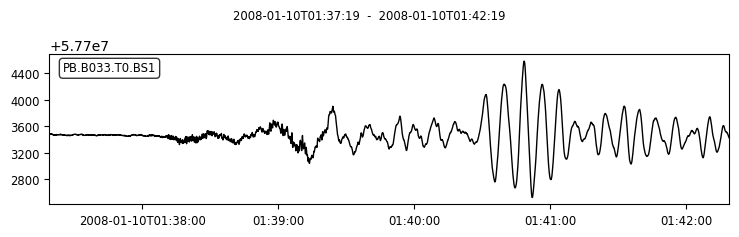

B035


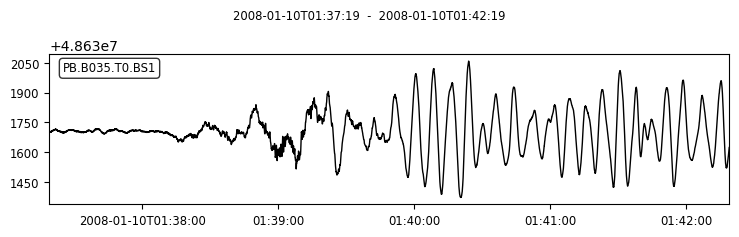

B036
0 B036 BS1 not found
0 B036 BS2 not found
0 B036 BS3 not found
0 B036 BS4 not found
B039


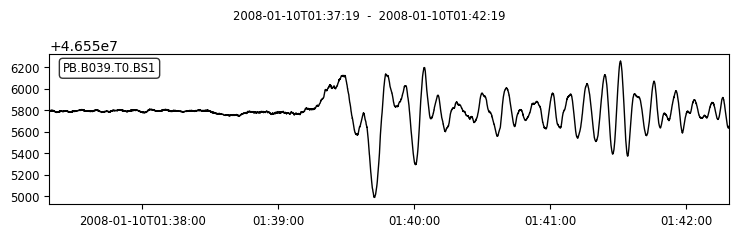

B040


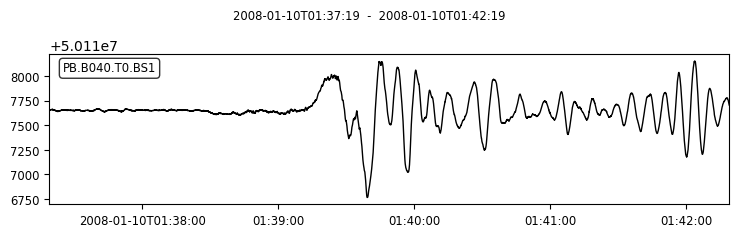

B045
0 B045 BS1 not found
0 B045 BS2 not found
0 B045 BS3 not found
0 B045 BS4 not found
B054
0 B054 BS1 not found
0 B054 BS2 not found
0 B054 BS3 not found
0 B054 BS4 not found
B057
0 B057 BS1 not found
0 B057 BS2 not found
0 B057 BS3 not found
0 B057 BS4 not found
B058
0 B058 BS1 not found
0 B058 BS2 not found
0 B058 BS3 not found
0 B058 BS4 not found
B065


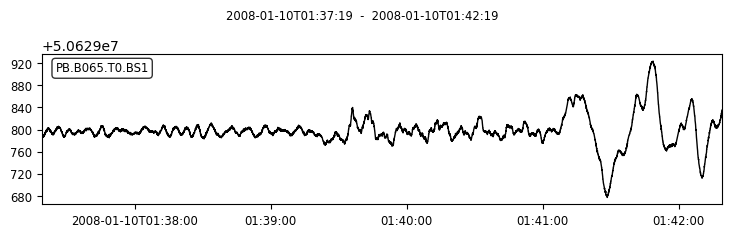

B066


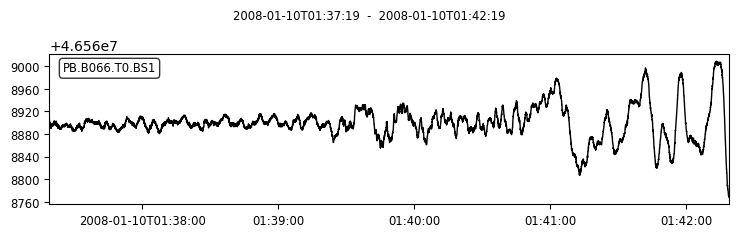

B067


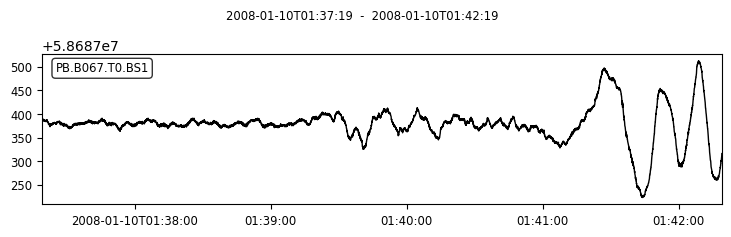

B072


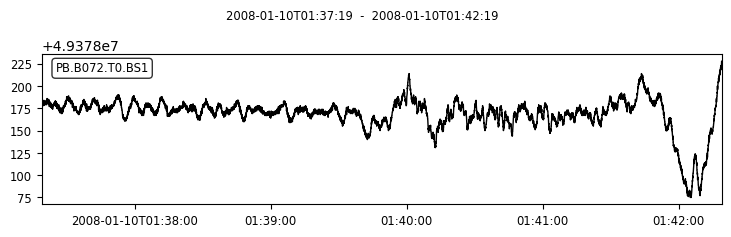

B073


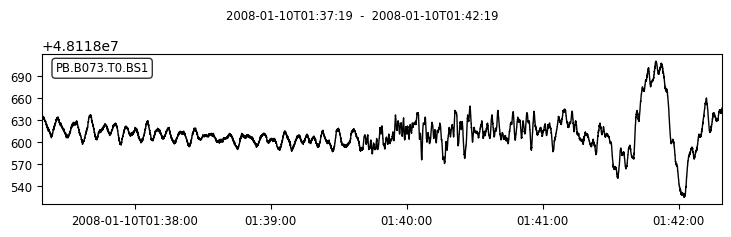

B075


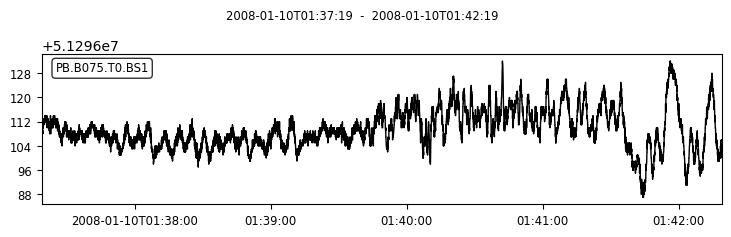

B076


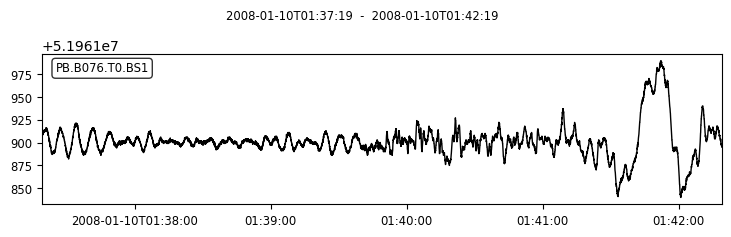

B078


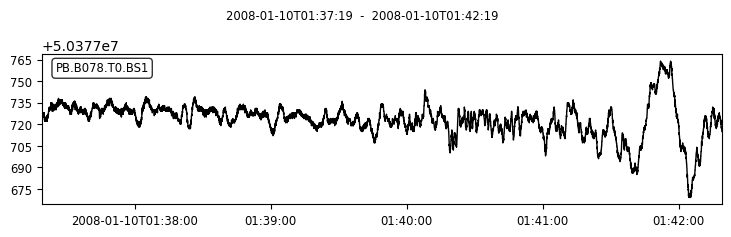

B079


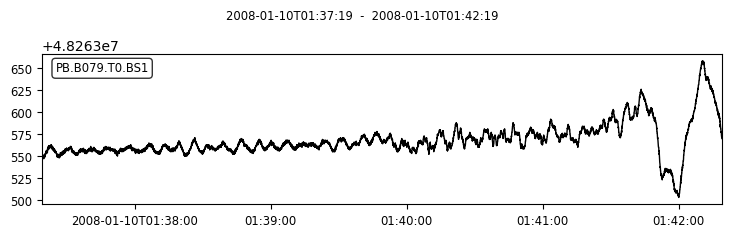

B081
0 B081 BS1 not found
0 B081 BS2 not found
0 B081 BS3 not found
0 B081 BS4 not found
B082


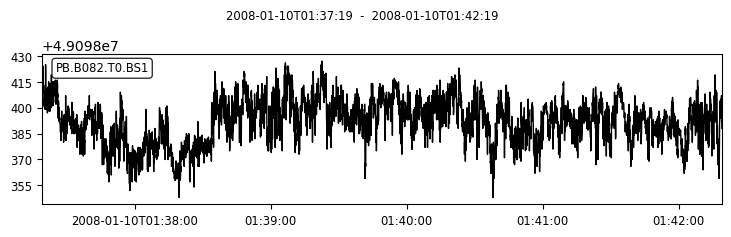

B084
0 B084 BS1 not found
0 B084 BS2 not found
0 B084 BS3 not found
0 B084 BS4 not found
B086
0 B086 BS1 not found
0 B086 BS2 not found
0 B086 BS3 not found
0 B086 BS4 not found
B087


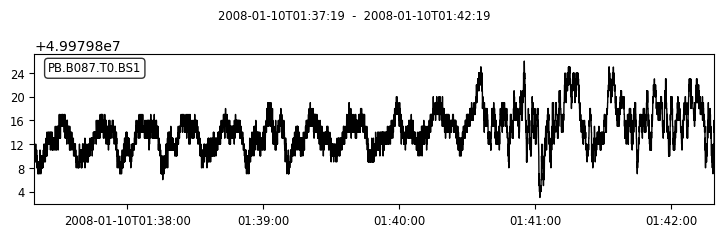

B088


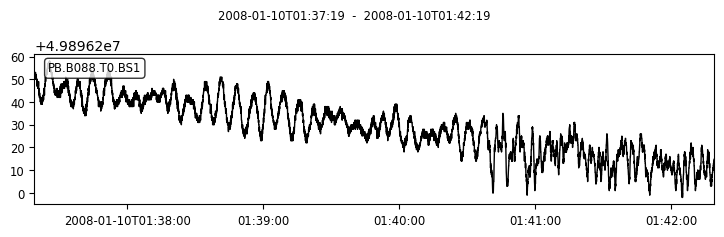

B089


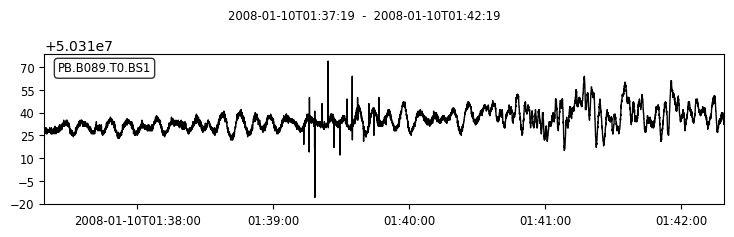

B093


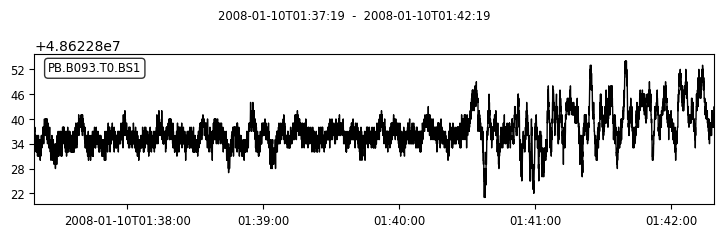

B201
0 B201 BS1 not found
0 B201 BS2 not found
0 B201 BS3 not found
0 B201 BS4 not found
B202
0 B202 BS1 not found
0 B202 BS2 not found
0 B202 BS3 not found
0 B202 BS4 not found
B203
0 B203 BS1 not found
0 B203 BS2 not found
0 B203 BS3 not found
0 B203 BS4 not found
B204
0 B204 BS1 not found
0 B204 BS2 not found
0 B204 BS3 not found
0 B204 BS4 not found
B205
0 B205 BS1 not found
0 B205 BS2 not found
0 B205 BS3 not found
0 B205 BS4 not found
B206
0 B206 BS1 not found
0 B206 BS2 not found
0 B206 BS3 not found
0 B206 BS4 not found
B207
0 B207 BS1 not found
0 B207 BS2 not found
0 B207 BS3 not found
0 B207 BS4 not found
B208
0 B208 BS1 not found
0 B208 BS2 not found
0 B208 BS3 not found
0 B208 BS4 not found
B900


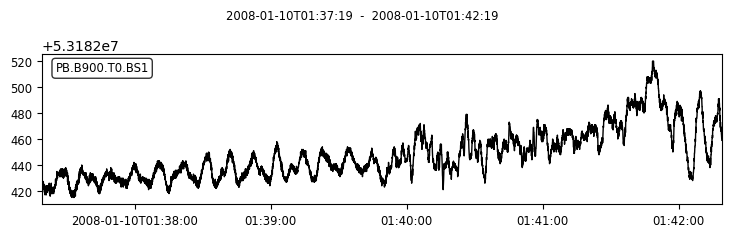

B901


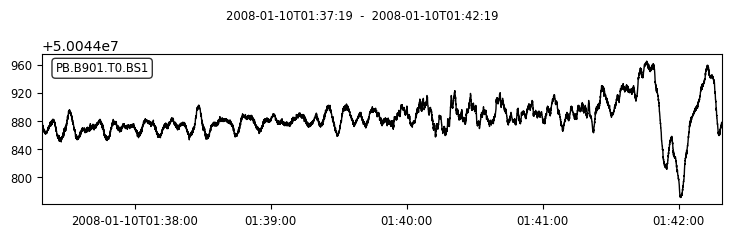

B916
0 B916 BS1 not found
0 B916 BS2 not found
0 B916 BS3 not found
0 B916 BS4 not found
B917
0 B917 BS1 not found
0 B917 BS2 not found
0 B917 BS3 not found
0 B917 BS4 not found
B918
0 B918 BS1 not found
0 B918 BS2 not found
0 B918 BS3 not found
0 B918 BS4 not found
B921
0 B921 BS1 not found
0 B921 BS2 not found
0 B921 BS3 not found
0 B921 BS4 not found
B926


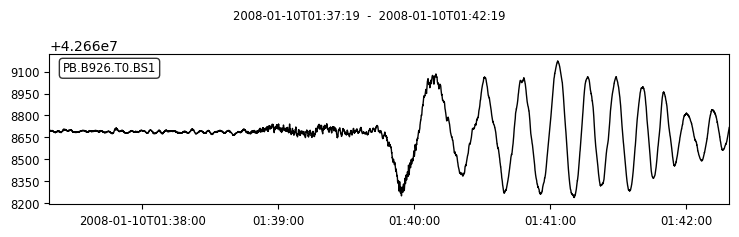

B927


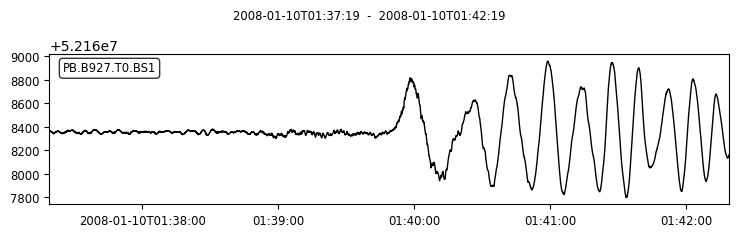

B928
0 B928 BS1 not found
0 B928 BS2 not found
0 B928 BS3 not found
0 B928 BS4 not found
B933
0 B933 BS1 not found
0 B933 BS2 not found
0 B933 BS3 not found
0 B933 BS4 not found
B934
0 B934 BS1 not found
0 B934 BS2 not found
0 B934 BS3 not found
0 B934 BS4 not found
B935
0 B935 BS1 not found
0 B935 BS2 not found
0 B935 BS3 not found
0 B935 BS4 not found
B941
0 B941 BS1 not found
0 B941 BS2 not found
0 B941 BS3 not found
0 B941 BS4 not found
B943
0 B943 BS1 not found
0 B943 BS2 not found
0 B943 BS3 not found
0 B943 BS4 not found
B944
0 B944 BS1 not found
0 B944 BS2 not found
0 B944 BS3 not found
0 B944 BS4 not found
B946
0 B946 BS1 not found
0 B946 BS2 not found
0 B946 BS3 not found
0 B946 BS4 not found
B950
0 B950 BS1 not found
0 B950 BS2 not found
0 B950 BS3 not found
0 B950 BS4 not found
-----------------------------------------
Earthquake 2/8
2008-01-09T14:40:00.960Z
B001


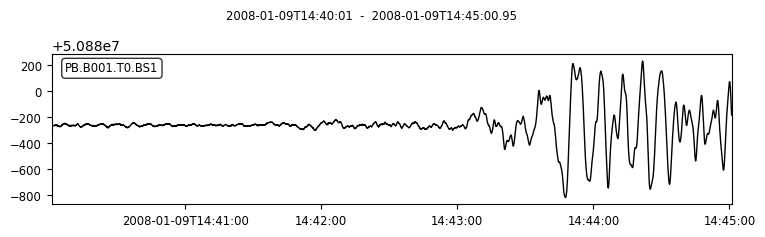

B003


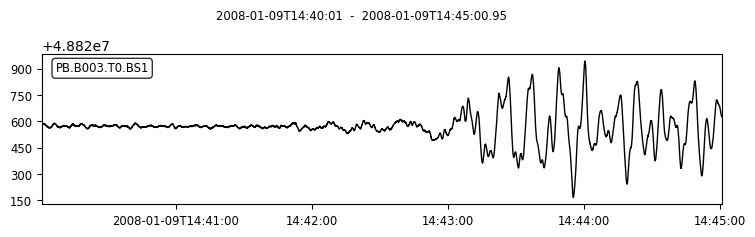

B004


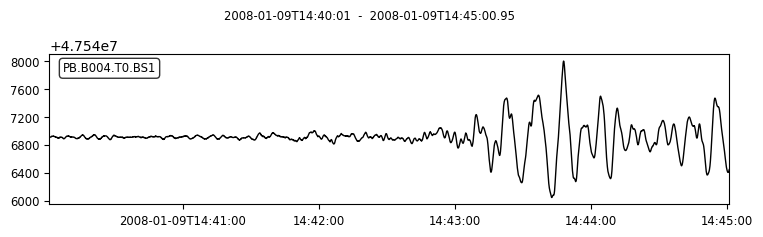

B005


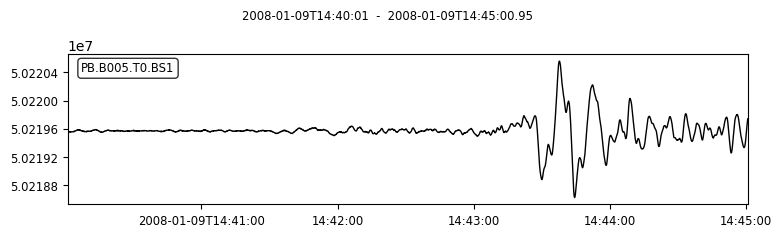

B006


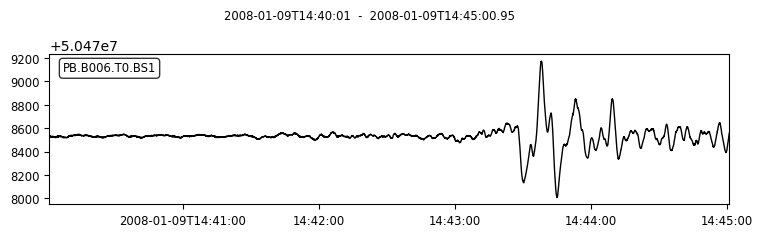

B007


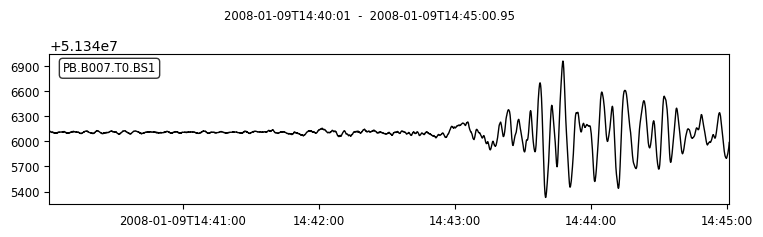

B009


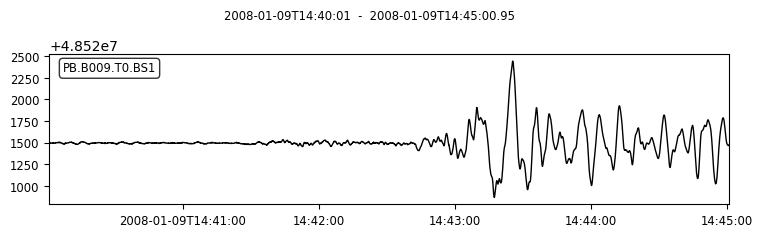

B010


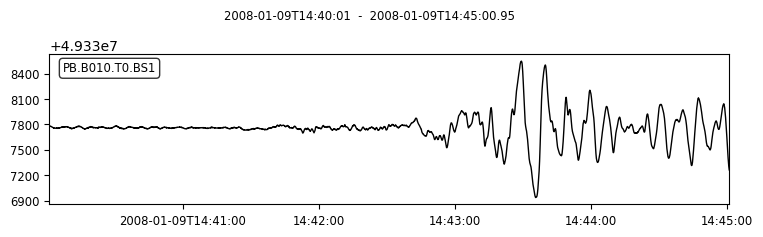

B011


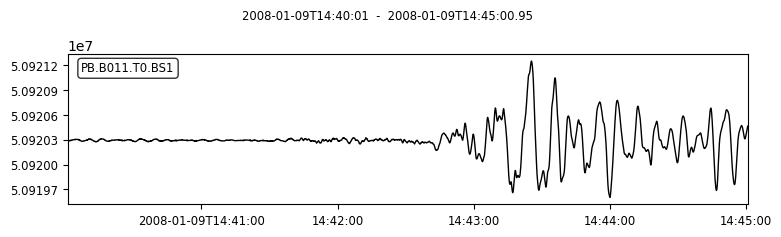

B012


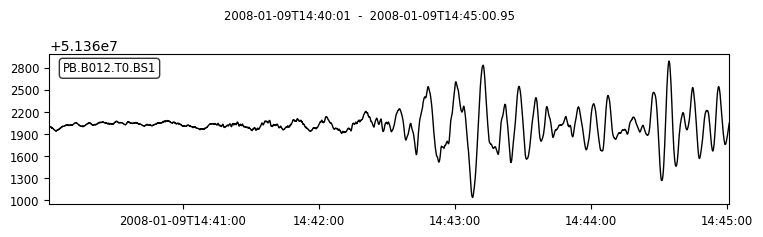

B013


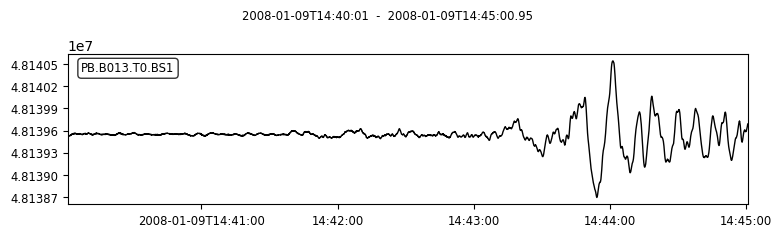

B014
1 B014 BS1 not found
1 B014 BS2 not found
1 B014 BS3 not found
1 B014 BS4 not found
B017


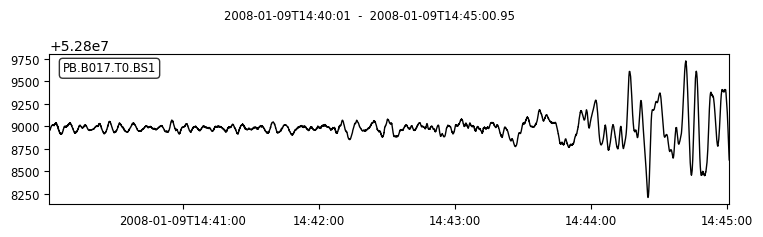

B018


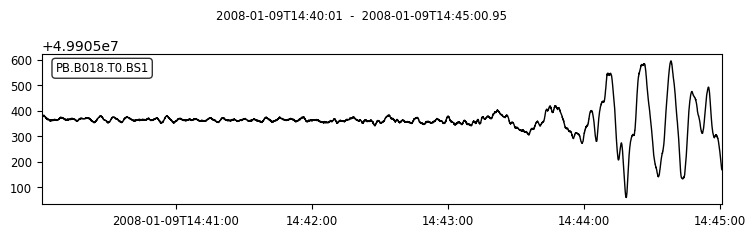

B019
1 B019 BS1 not found
1 B019 BS2 not found
1 B019 BS3 not found
1 B019 BS4 not found
B020
1 B020 BS1 not found
1 B020 BS2 not found
1 B020 BS3 not found
1 B020 BS4 not found
B022


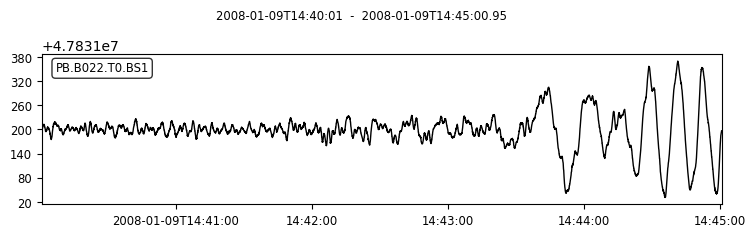

B023
1 B023 BS1 not found
1 B023 BS2 not found
1 B023 BS3 not found
1 B023 BS4 not found
B024
1 B024 BS1 not found
1 B024 BS2 not found
1 B024 BS3 not found
1 B024 BS4 not found
B026


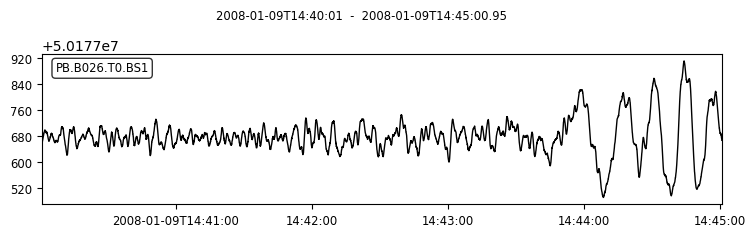

B027


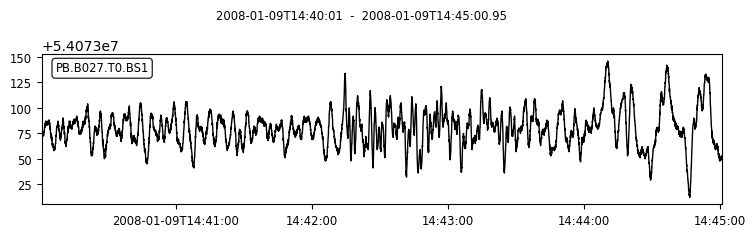

B028


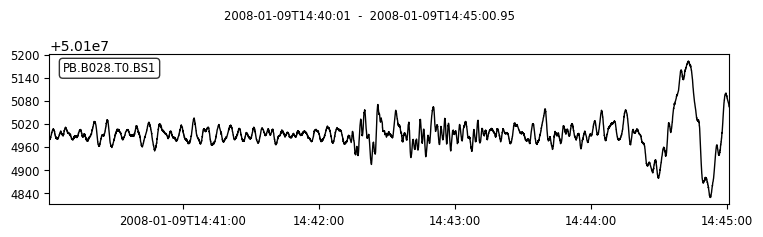

B030


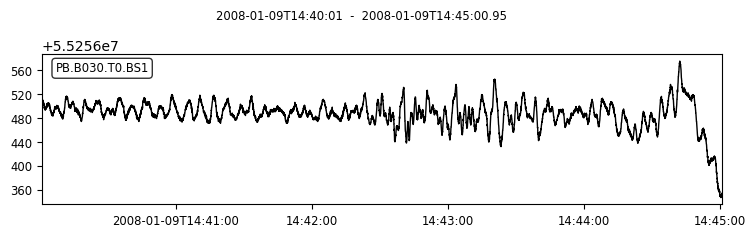

B031


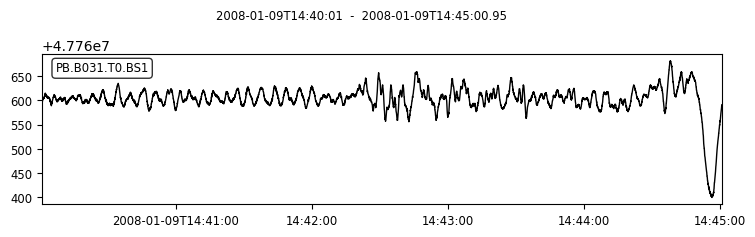

B032
1 B032 BS1 not found
1 B032 BS2 not found
1 B032 BS3 not found
1 B032 BS4 not found
B033


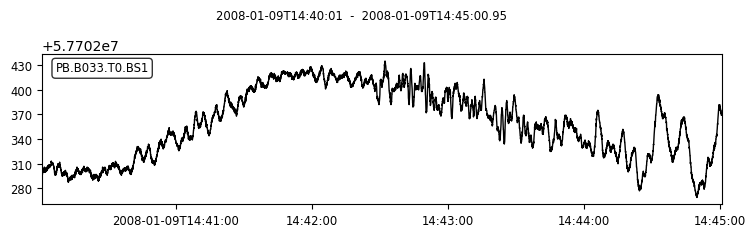

B035


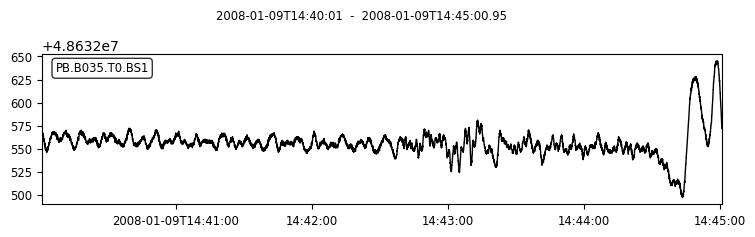

B036
1 B036 BS1 not found
1 B036 BS2 not found
1 B036 BS3 not found
1 B036 BS4 not found
B039


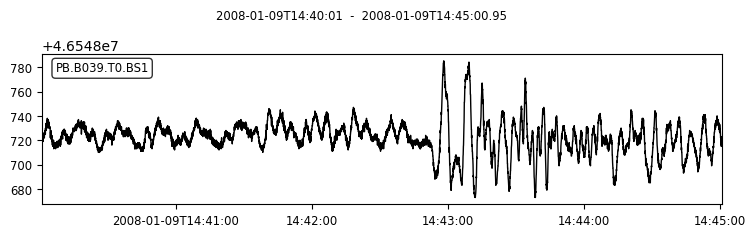

B040


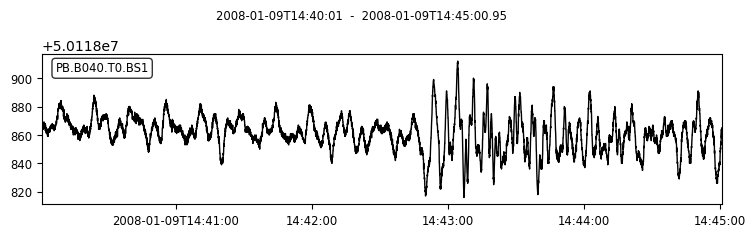

B045
1 B045 BS1 not found
1 B045 BS2 not found
1 B045 BS3 not found
1 B045 BS4 not found
B054
1 B054 BS1 not found
1 B054 BS2 not found
1 B054 BS3 not found
1 B054 BS4 not found
B057
1 B057 BS1 not found
1 B057 BS2 not found
1 B057 BS3 not found
1 B057 BS4 not found
B058
1 B058 BS1 not found
1 B058 BS2 not found
1 B058 BS3 not found
1 B058 BS4 not found
B065


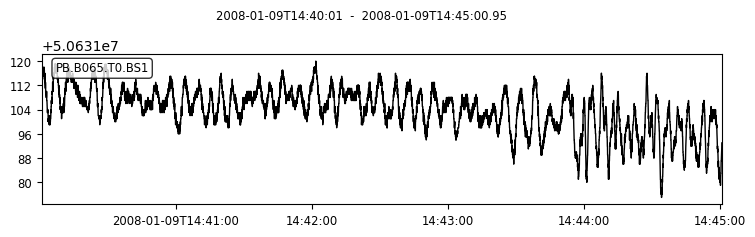

B066


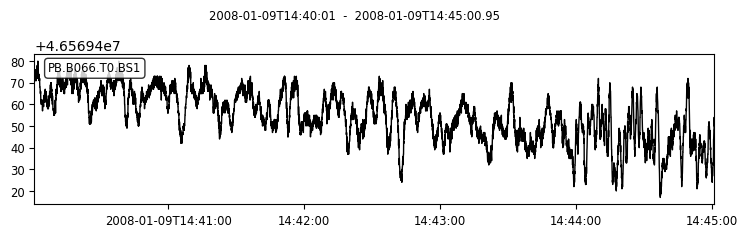

B067
1 B067 BS1 not found
1 B067 BS2 not found
1 B067 BS3 not found
1 B067 BS4 not found
B072


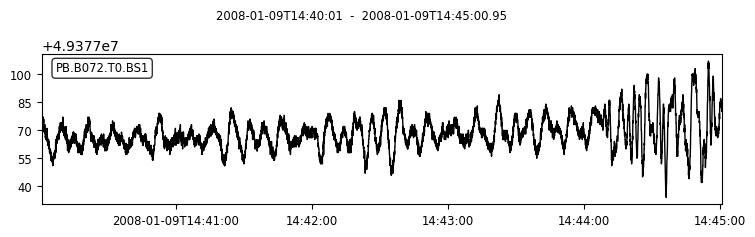

B073


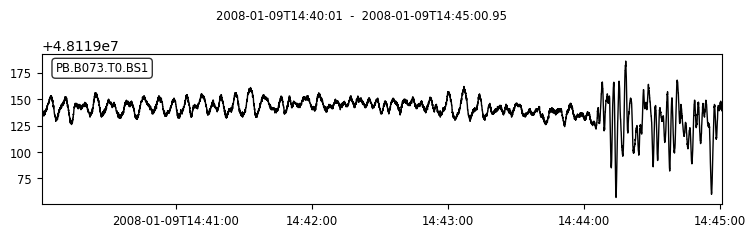

B075


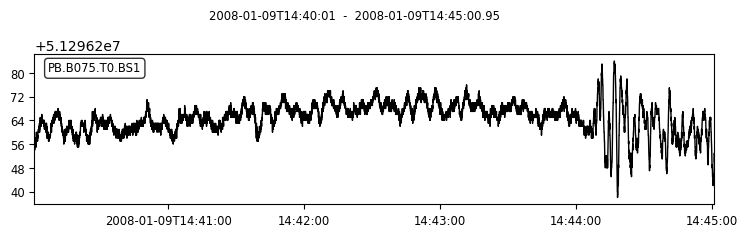

B076


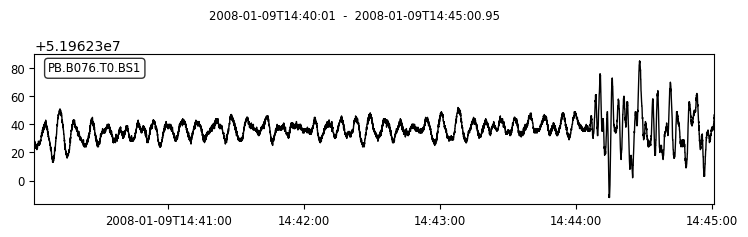

B078


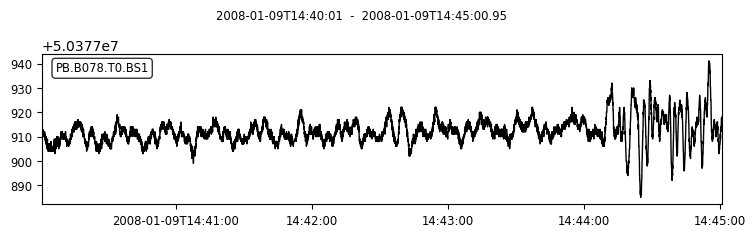

B079


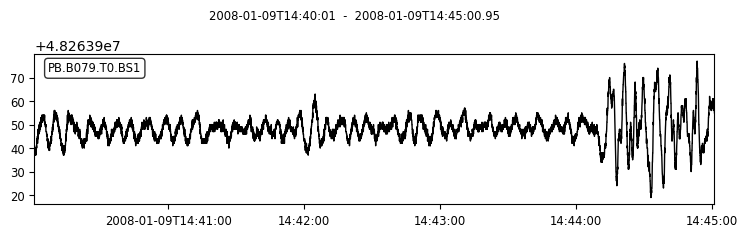

B081
1 B081 BS1 not found
1 B081 BS2 not found
1 B081 BS3 not found
1 B081 BS4 not found
B082


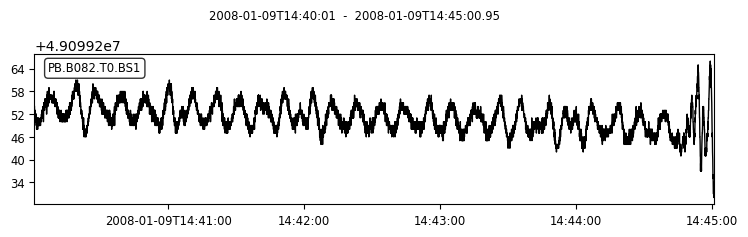

B084
1 B084 BS1 not found
1 B084 BS2 not found
1 B084 BS3 not found
1 B084 BS4 not found
B086
1 B086 BS1 not found
1 B086 BS2 not found
1 B086 BS3 not found
1 B086 BS4 not found
B087


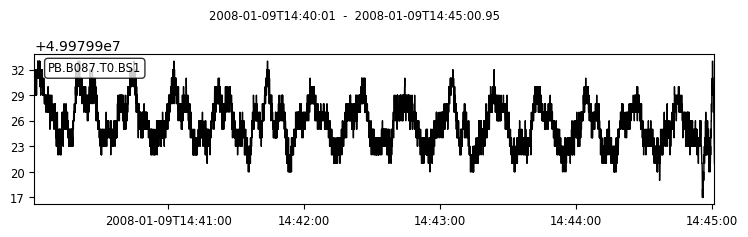

B088


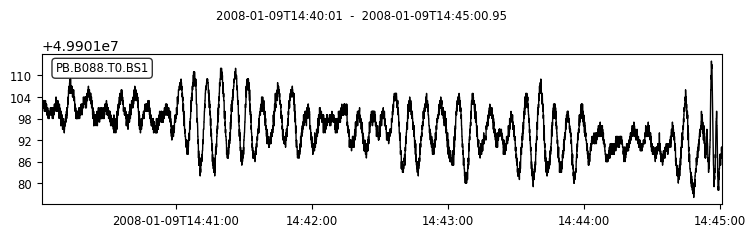

B089
1 B089 BS1 not found
1 B089 BS2 not found
1 B089 BS3 not found
1 B089 BS4 not found
B093


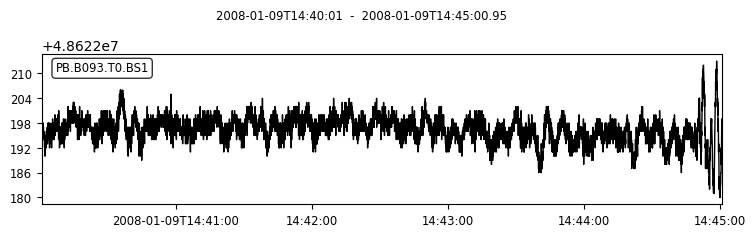

B201
1 B201 BS1 not found
1 B201 BS2 not found
1 B201 BS3 not found
1 B201 BS4 not found
B202
1 B202 BS1 not found
1 B202 BS2 not found
1 B202 BS3 not found
1 B202 BS4 not found
B203
1 B203 BS1 not found
1 B203 BS2 not found
1 B203 BS3 not found
1 B203 BS4 not found
B204
1 B204 BS1 not found
1 B204 BS2 not found
1 B204 BS3 not found
1 B204 BS4 not found
B205
1 B205 BS1 not found
1 B205 BS2 not found
1 B205 BS3 not found
1 B205 BS4 not found
B206
1 B206 BS1 not found
1 B206 BS2 not found
1 B206 BS3 not found
1 B206 BS4 not found
B207
1 B207 BS1 not found
1 B207 BS2 not found
1 B207 BS3 not found
1 B207 BS4 not found
B208
1 B208 BS1 not found
1 B208 BS2 not found
1 B208 BS3 not found
1 B208 BS4 not found
B900


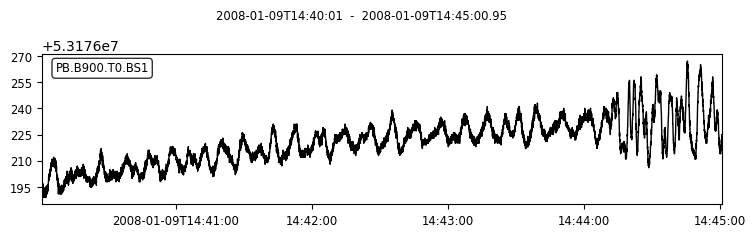

B901


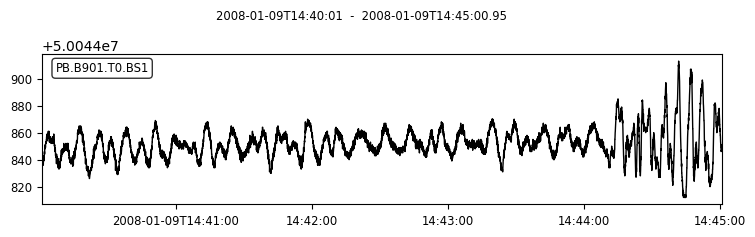

B916
1 B916 BS1 not found
1 B916 BS2 not found
1 B916 BS3 not found
1 B916 BS4 not found
B917
1 B917 BS1 not found
1 B917 BS2 not found
1 B917 BS3 not found
1 B917 BS4 not found
B918
1 B918 BS1 not found
1 B918 BS2 not found
1 B918 BS3 not found
1 B918 BS4 not found
B921
1 B921 BS1 not found
1 B921 BS2 not found
1 B921 BS3 not found
1 B921 BS4 not found
B926


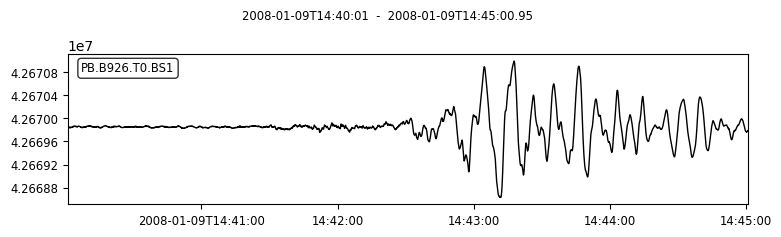

B927


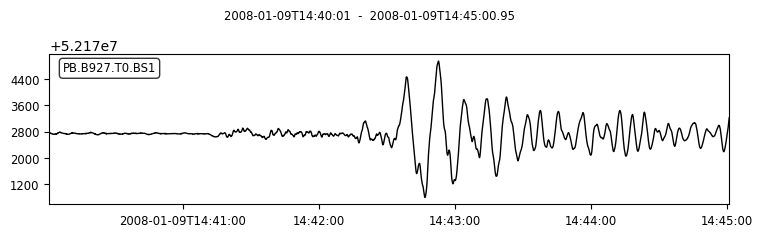

B928
1 B928 BS1 not found
1 B928 BS2 not found
1 B928 BS3 not found
1 B928 BS4 not found
B933
1 B933 BS1 not found
1 B933 BS2 not found
1 B933 BS3 not found
1 B933 BS4 not found
B934
1 B934 BS1 not found
1 B934 BS2 not found
1 B934 BS3 not found
1 B934 BS4 not found
B935
1 B935 BS1 not found
1 B935 BS2 not found
1 B935 BS3 not found
1 B935 BS4 not found
B941
1 B941 BS1 not found
1 B941 BS2 not found
1 B941 BS3 not found
1 B941 BS4 not found
B943
1 B943 BS1 not found
1 B943 BS2 not found
1 B943 BS3 not found
1 B943 BS4 not found
B944
1 B944 BS1 not found
1 B944 BS2 not found
1 B944 BS3 not found
1 B944 BS4 not found
B946
1 B946 BS1 not found
1 B946 BS2 not found
1 B946 BS3 not found
1 B946 BS4 not found
B950
1 B950 BS1 not found
1 B950 BS2 not found
1 B950 BS3 not found
1 B950 BS4 not found
-----------------------------------------
Earthquake 3/8
2008-01-05T11:44:48.170Z
B001


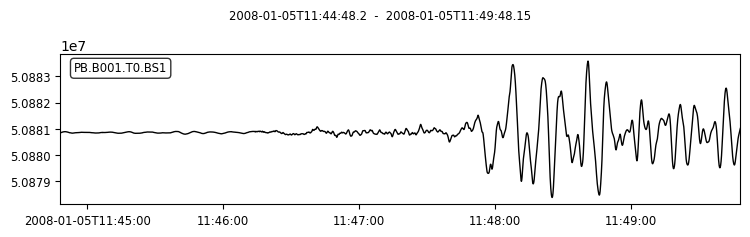

B003


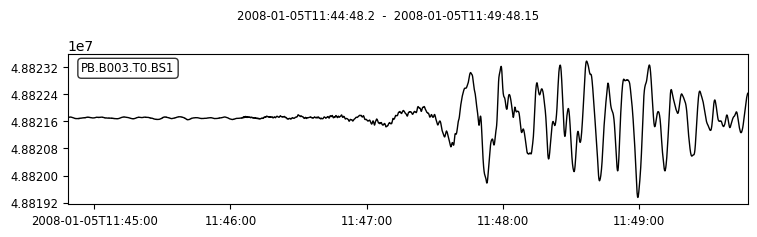

B004


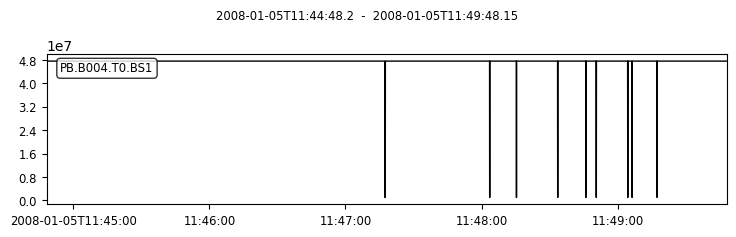

B005


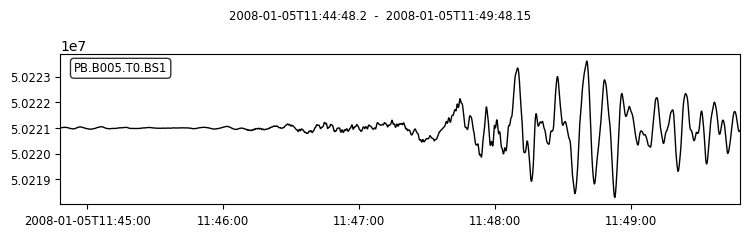

B006


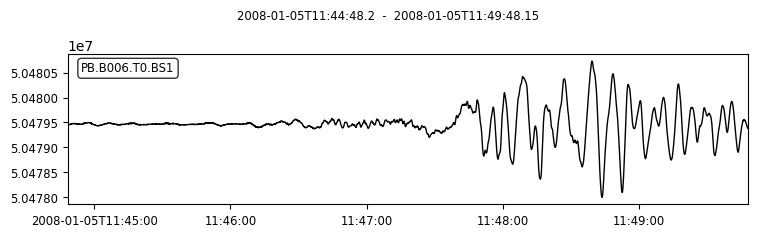

B007


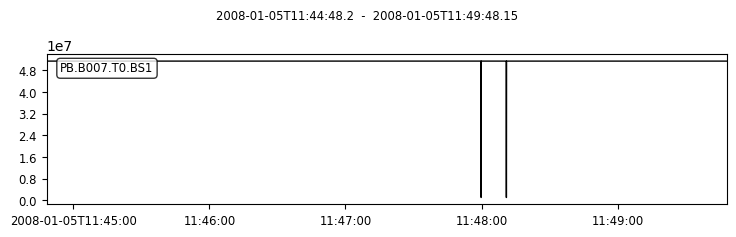

B009


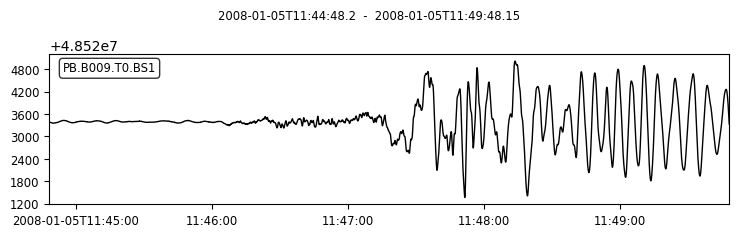

B010


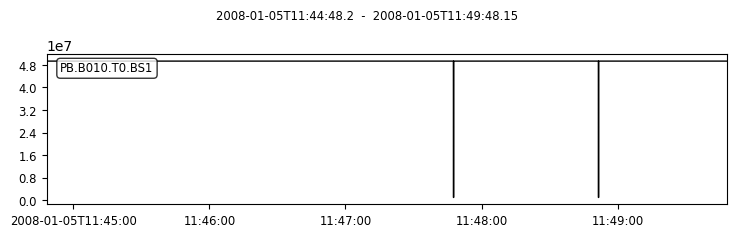

B011


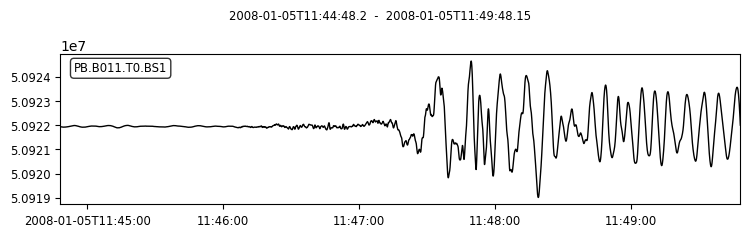

B012


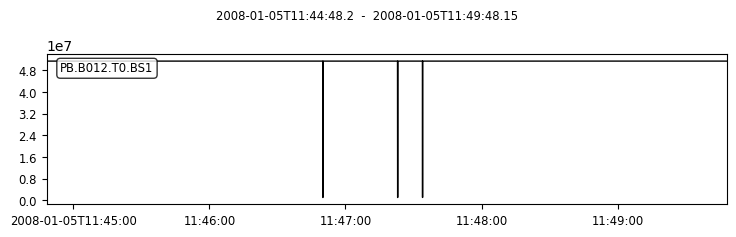

B013


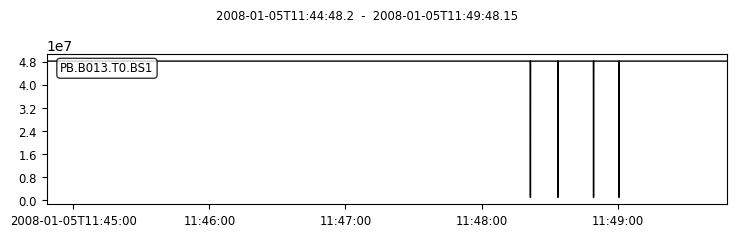

B014
2 B014 BS1 not found
2 B014 BS2 not found
2 B014 BS3 not found
2 B014 BS4 not found
B017


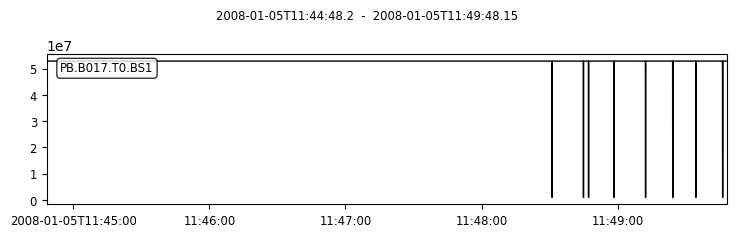

B018


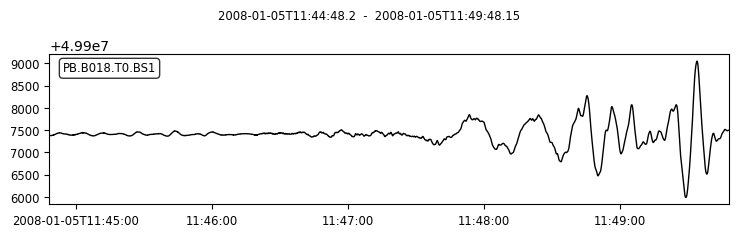

B019
2 B019 BS1 not found
2 B019 BS2 not found
2 B019 BS3 not found
2 B019 BS4 not found
B020
2 B020 BS1 not found
2 B020 BS2 not found
2 B020 BS3 not found
2 B020 BS4 not found
B022


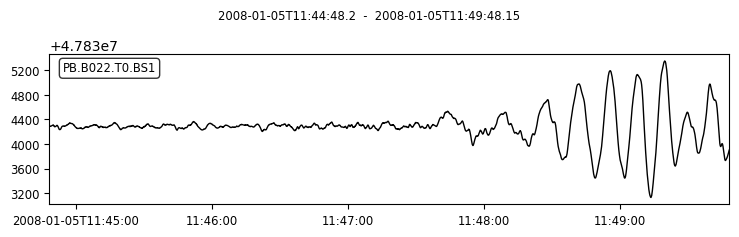

B023
2 B023 BS1 not found
2 B023 BS2 not found
2 B023 BS3 not found
2 B023 BS4 not found
B024
2 B024 BS1 not found
2 B024 BS2 not found
2 B024 BS3 not found
2 B024 BS4 not found
B026


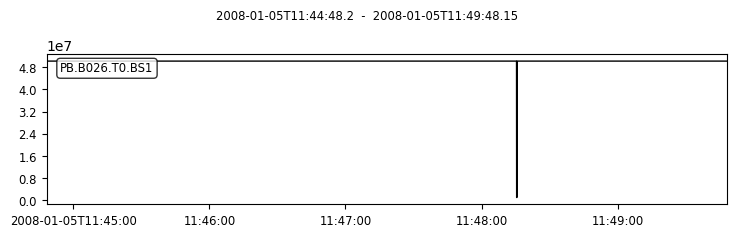

B027


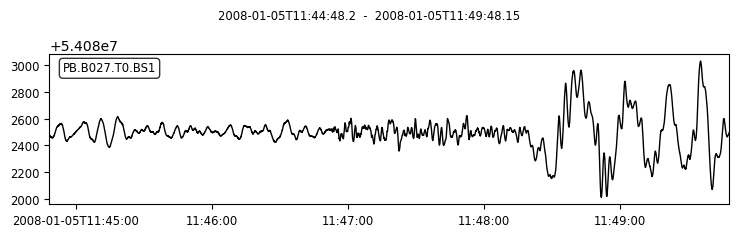

B028


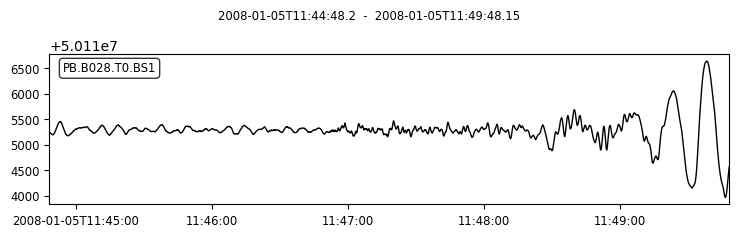

B030


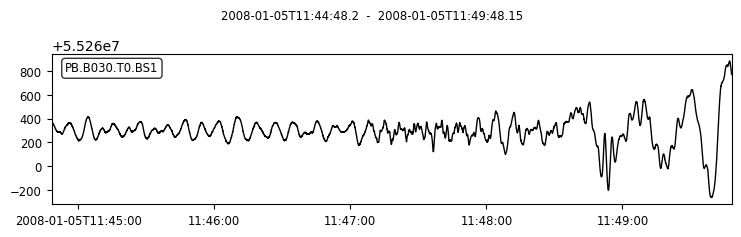

B031


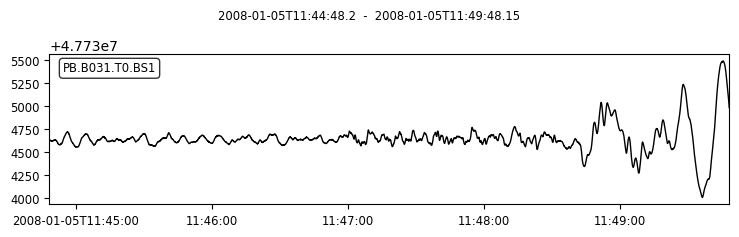

B032
2 B032 BS1 not found
2 B032 BS2 not found
2 B032 BS3 not found
2 B032 BS4 not found
B033


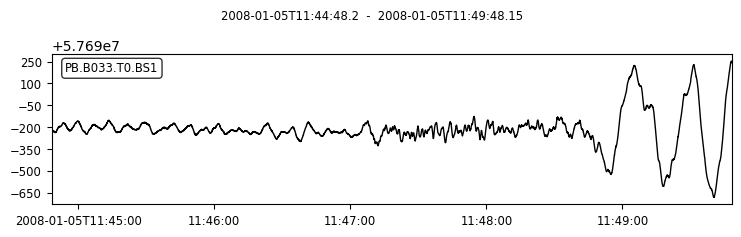

B035


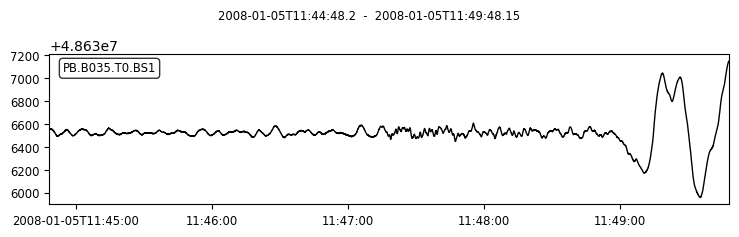

B036
2 B036 BS1 not found
2 B036 BS2 not found
2 B036 BS3 not found
2 B036 BS4 not found
B039


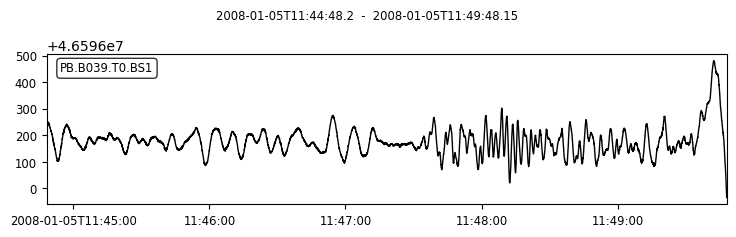

B040


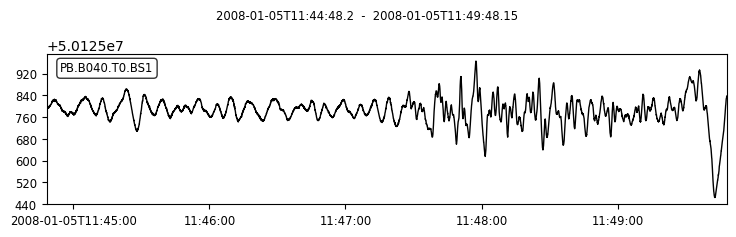

B045
2 B045 BS1 not found
2 B045 BS2 not found
2 B045 BS3 not found
2 B045 BS4 not found
B054
2 B054 BS1 not found
2 B054 BS2 not found
2 B054 BS3 not found
2 B054 BS4 not found
B057
2 B057 BS1 not found
2 B057 BS2 not found
2 B057 BS3 not found
2 B057 BS4 not found
B058
2 B058 BS1 not found
2 B058 BS2 not found
2 B058 BS3 not found
2 B058 BS4 not found
B065


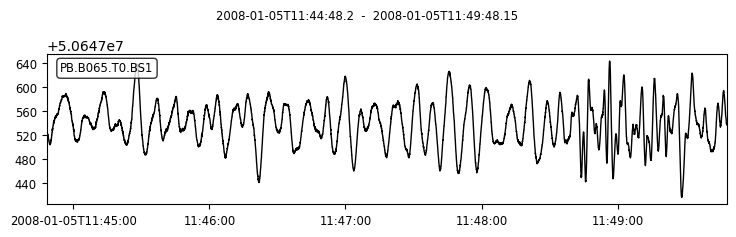

B066


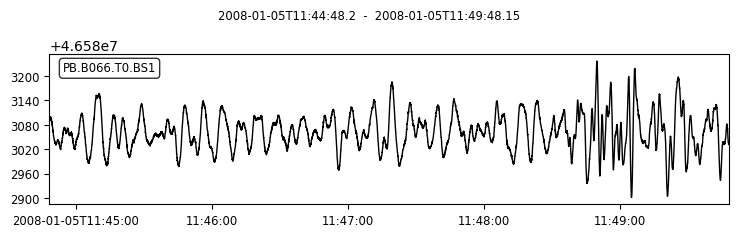

B067
2 B067 BS1 not found
2 B067 BS2 not found
2 B067 BS3 not found
2 B067 BS4 not found
B072


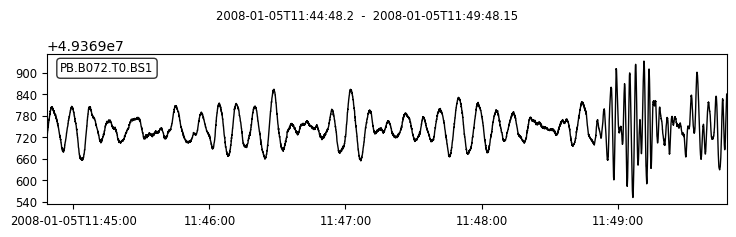

B073


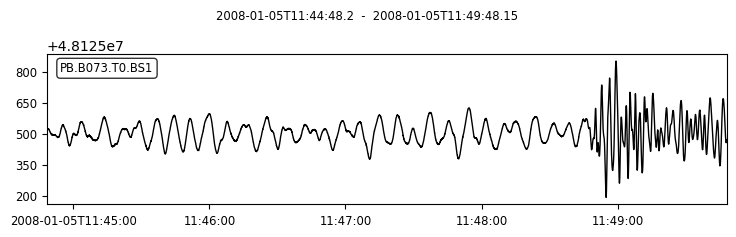

B075


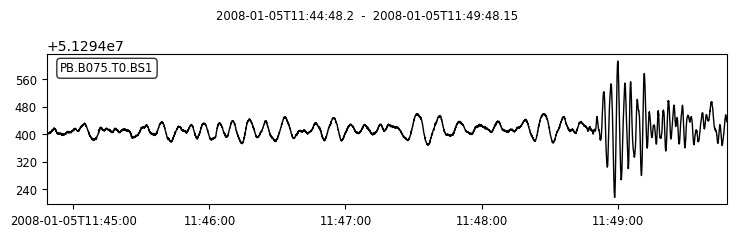

B076


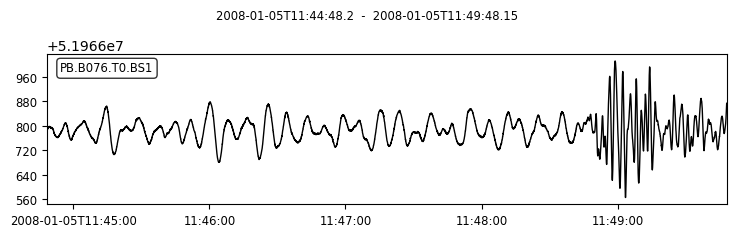

B078


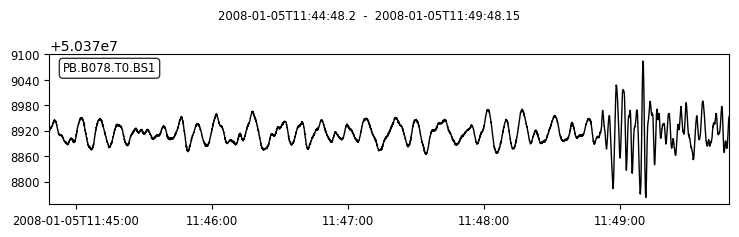

B079


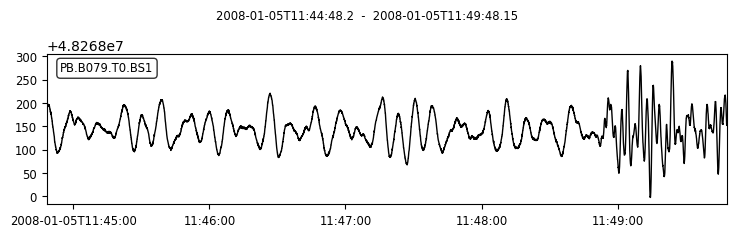

B081
2 B081 BS1 not found
2 B081 BS2 not found
2 B081 BS3 not found
2 B081 BS4 not found
B082


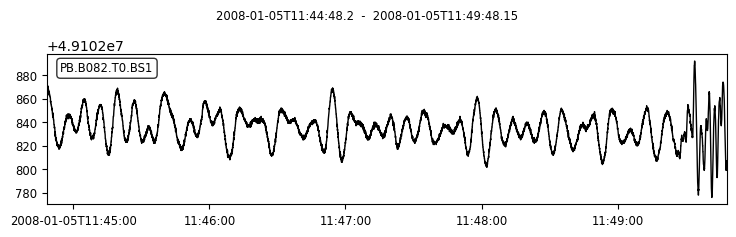

B084
2 B084 BS1 not found
2 B084 BS2 not found
2 B084 BS3 not found
2 B084 BS4 not found
B086
2 B086 BS1 not found
2 B086 BS2 not found
2 B086 BS3 not found
2 B086 BS4 not found
B087


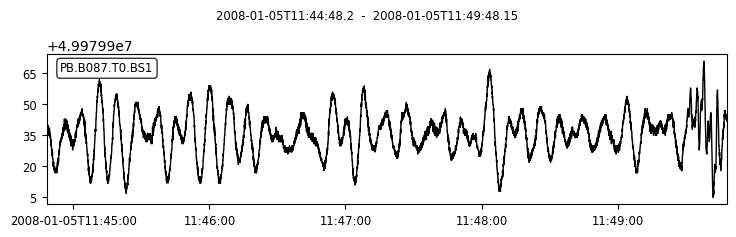

B088


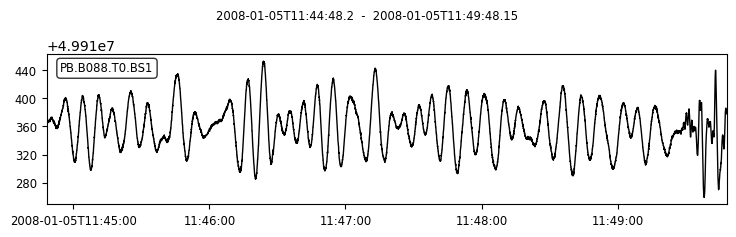

B089


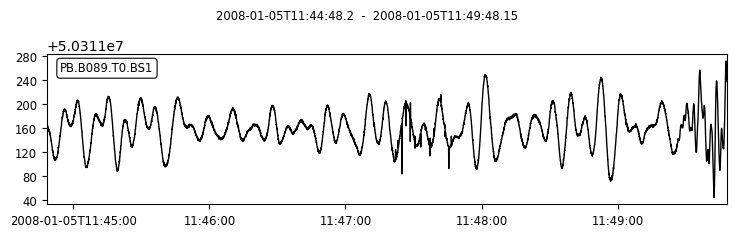

B093


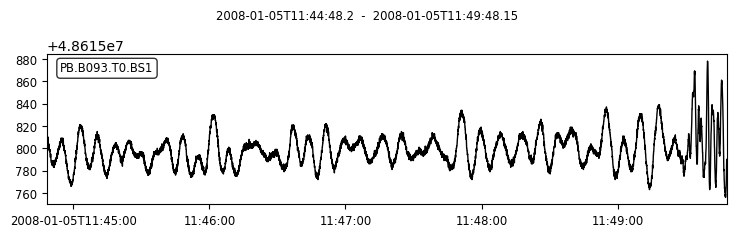

B201
2 B201 BS1 not found
2 B201 BS2 not found
2 B201 BS3 not found
2 B201 BS4 not found
B202
2 B202 BS1 not found
2 B202 BS2 not found
2 B202 BS3 not found
2 B202 BS4 not found
B203
2 B203 BS1 not found
2 B203 BS2 not found
2 B203 BS3 not found
2 B203 BS4 not found
B204
2 B204 BS1 not found
2 B204 BS2 not found
2 B204 BS3 not found
2 B204 BS4 not found
B205
2 B205 BS1 not found
2 B205 BS2 not found
2 B205 BS3 not found
2 B205 BS4 not found
B206
2 B206 BS1 not found
2 B206 BS2 not found
2 B206 BS3 not found
2 B206 BS4 not found
B207
2 B207 BS1 not found
2 B207 BS2 not found
2 B207 BS3 not found
2 B207 BS4 not found
B208
2 B208 BS1 not found
2 B208 BS2 not found
2 B208 BS3 not found
2 B208 BS4 not found
B900


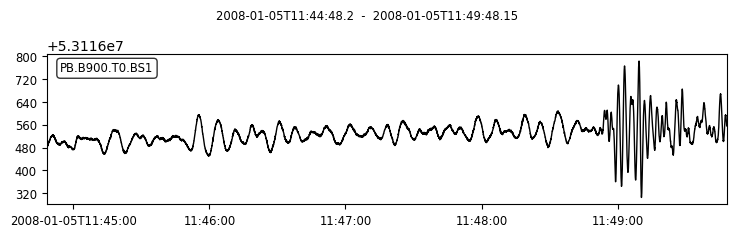

B901


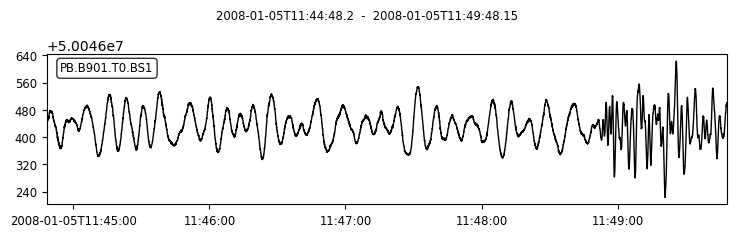

B916
2 B916 BS1 not found
2 B916 BS2 not found
2 B916 BS3 not found
2 B916 BS4 not found
B917
2 B917 BS1 not found
2 B917 BS2 not found
2 B917 BS3 not found
2 B917 BS4 not found
B918
2 B918 BS1 not found
2 B918 BS2 not found
2 B918 BS3 not found
2 B918 BS4 not found
B921
2 B921 BS1 not found
2 B921 BS2 not found
2 B921 BS3 not found
2 B921 BS4 not found
B926


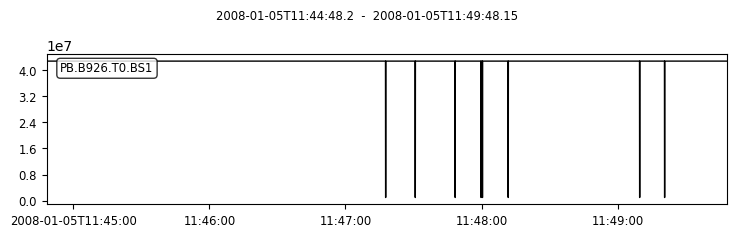

B927


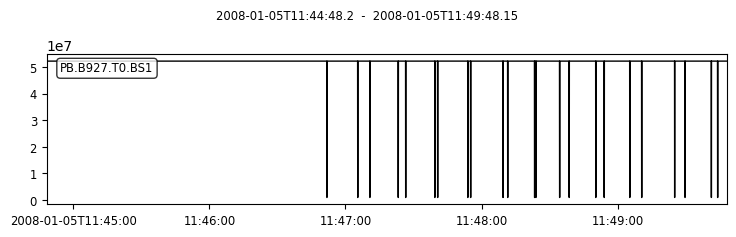

B928
2 B928 BS1 not found
2 B928 BS2 not found
2 B928 BS3 not found
2 B928 BS4 not found
B933
2 B933 BS1 not found
2 B933 BS2 not found
2 B933 BS3 not found
2 B933 BS4 not found
B934
2 B934 BS1 not found
2 B934 BS2 not found
2 B934 BS3 not found
2 B934 BS4 not found
B935
2 B935 BS1 not found
2 B935 BS2 not found
2 B935 BS3 not found
2 B935 BS4 not found
B941
2 B941 BS1 not found
2 B941 BS2 not found
2 B941 BS3 not found
2 B941 BS4 not found
B943
2 B943 BS1 not found
2 B943 BS2 not found
2 B943 BS3 not found
2 B943 BS4 not found
B944
2 B944 BS1 not found
2 B944 BS2 not found
2 B944 BS3 not found
2 B944 BS4 not found
B946
2 B946 BS1 not found
2 B946 BS2 not found
2 B946 BS3 not found
2 B946 BS4 not found
B950
2 B950 BS1 not found
2 B950 BS2 not found
2 B950 BS3 not found
2 B950 BS4 not found
-----------------------------------------
Earthquake 4/8
2008-01-05T11:01:06.110Z
B001


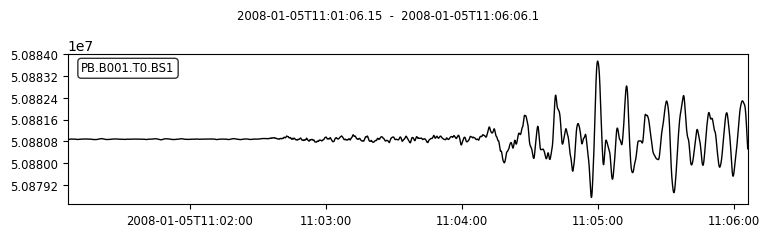

B003


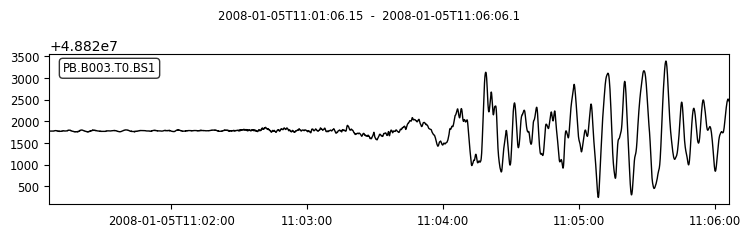

B004


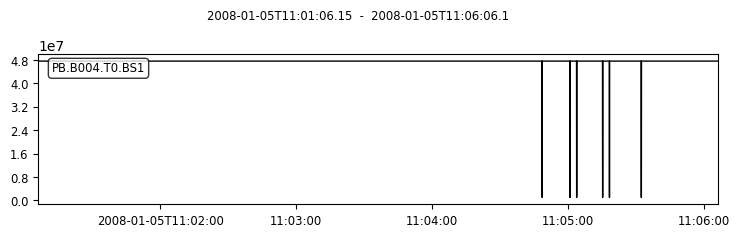

B005


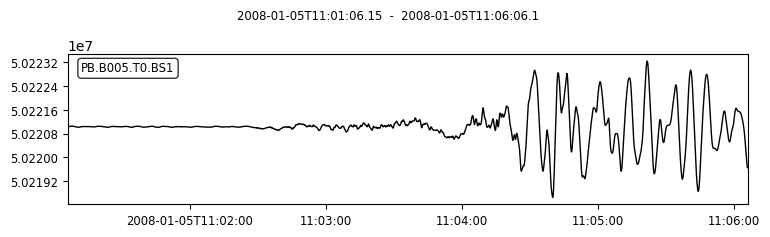

B006


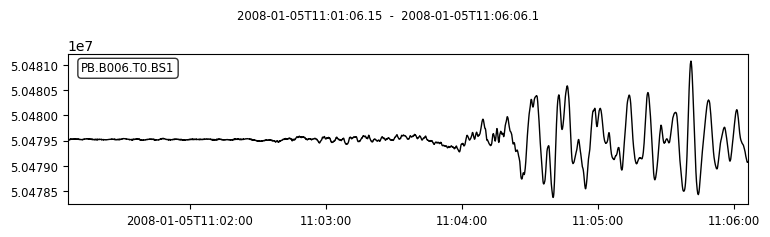

B007


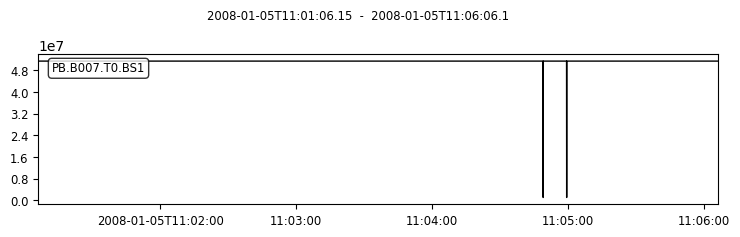

B009


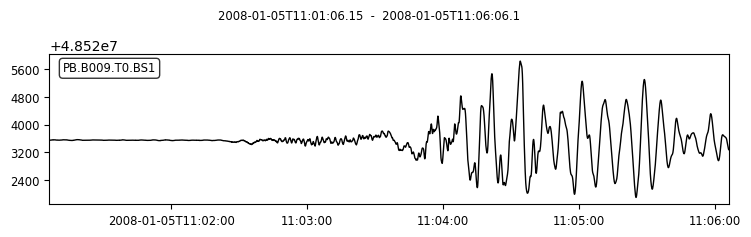

B010


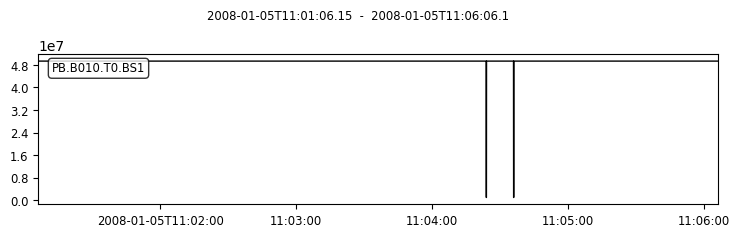

B011


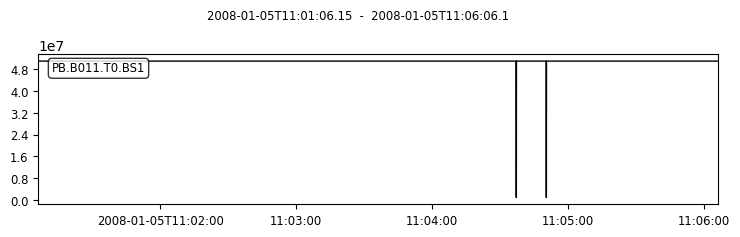

B012


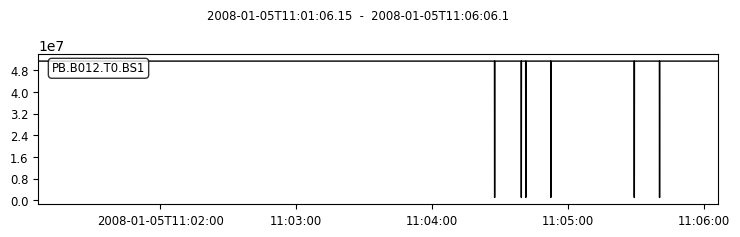

B013


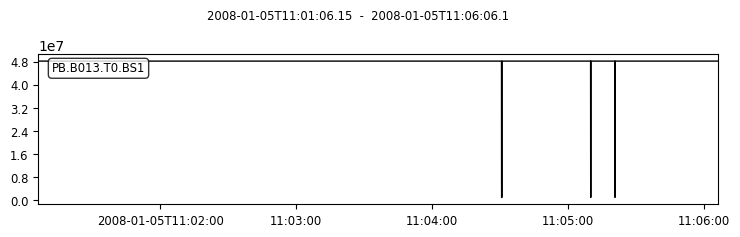

B014
3 B014 BS1 not found
3 B014 BS2 not found
3 B014 BS3 not found
3 B014 BS4 not found
B017


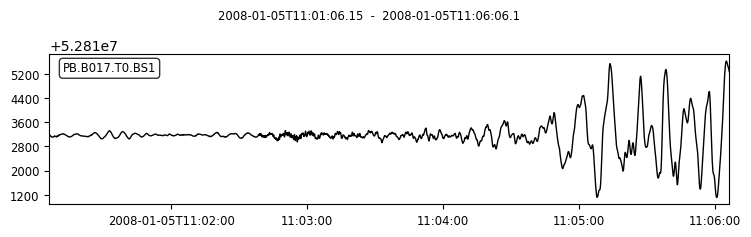

B018


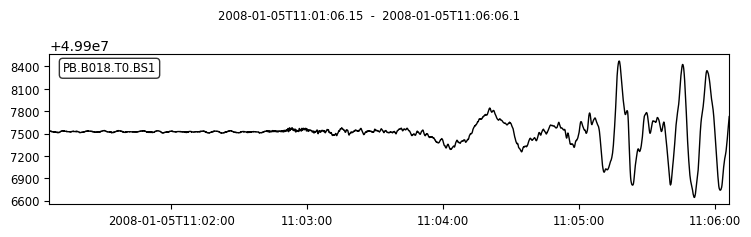

B019
3 B019 BS1 not found
3 B019 BS2 not found
3 B019 BS3 not found
3 B019 BS4 not found
B020
3 B020 BS1 not found
3 B020 BS2 not found
3 B020 BS3 not found
3 B020 BS4 not found
B022


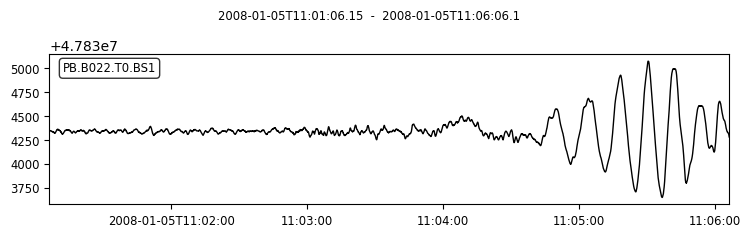

B023
3 B023 BS1 not found
3 B023 BS2 not found
3 B023 BS3 not found
3 B023 BS4 not found
B024
3 B024 BS1 not found
3 B024 BS2 not found
3 B024 BS3 not found
3 B024 BS4 not found
B026


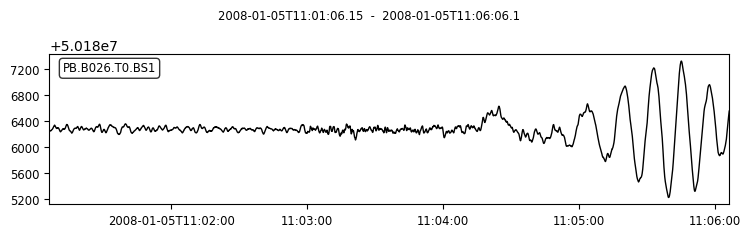

B027


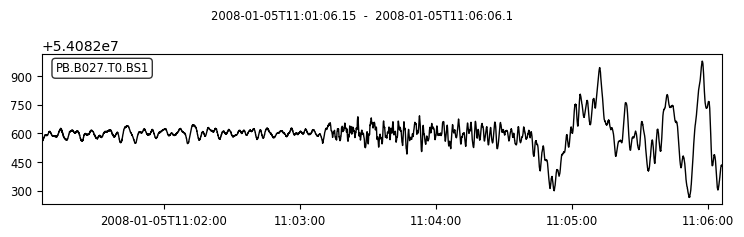

B028


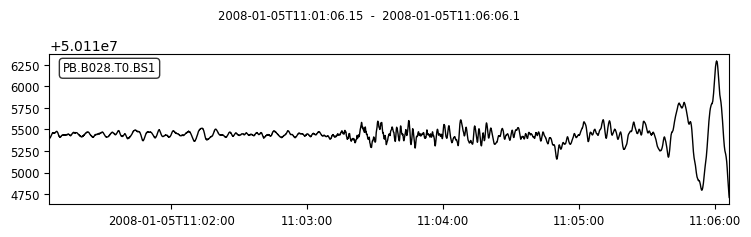

B030


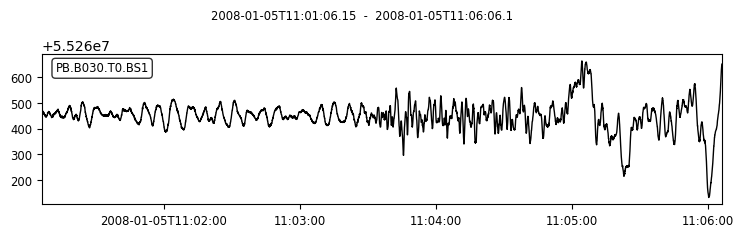

B031


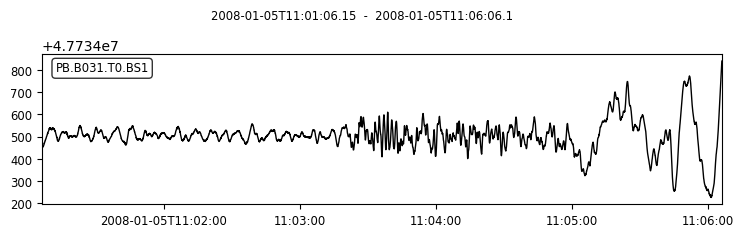

B032
3 B032 BS1 not found
3 B032 BS2 not found
3 B032 BS3 not found
3 B032 BS4 not found
B033


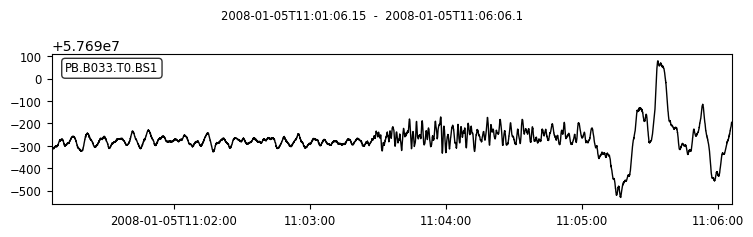

B035


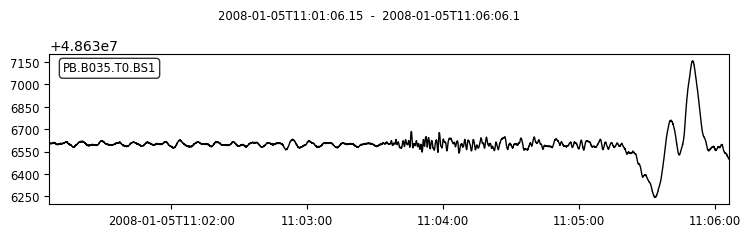

B036
3 B036 BS1 not found
3 B036 BS2 not found
3 B036 BS3 not found
3 B036 BS4 not found
B039


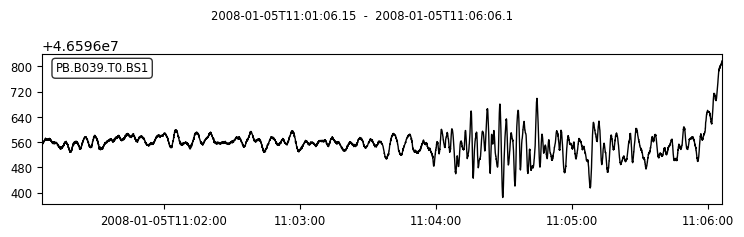

B040


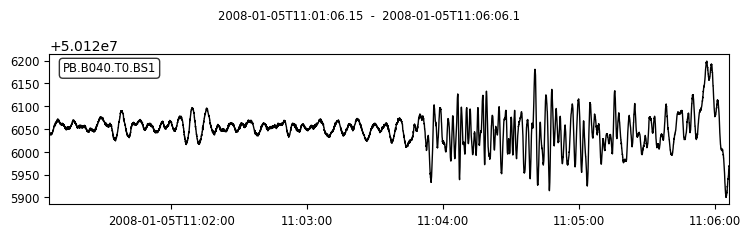

B045
3 B045 BS1 not found
3 B045 BS2 not found
3 B045 BS3 not found
3 B045 BS4 not found
B054
3 B054 BS1 not found
3 B054 BS2 not found
3 B054 BS3 not found
3 B054 BS4 not found
B057
3 B057 BS1 not found
3 B057 BS2 not found
3 B057 BS3 not found
3 B057 BS4 not found
B058
3 B058 BS1 not found
3 B058 BS2 not found
3 B058 BS3 not found
3 B058 BS4 not found
B065


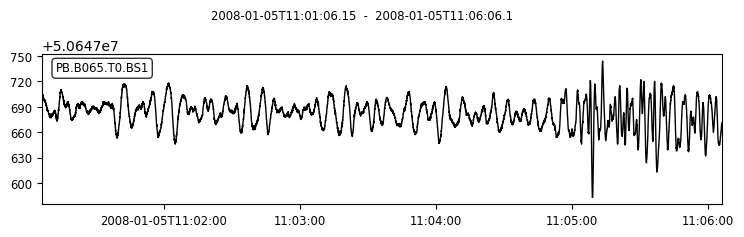

B066


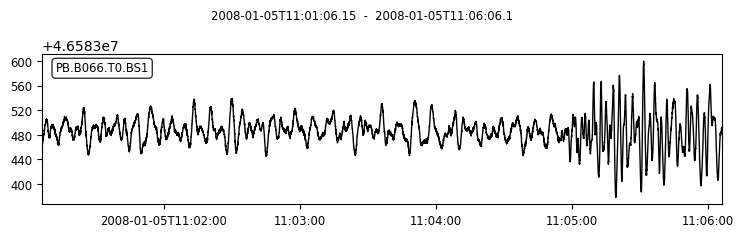

B067
3 B067 BS1 not found
3 B067 BS2 not found
3 B067 BS3 not found
3 B067 BS4 not found
B072


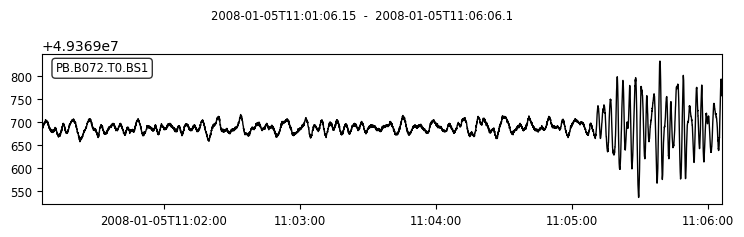

B073


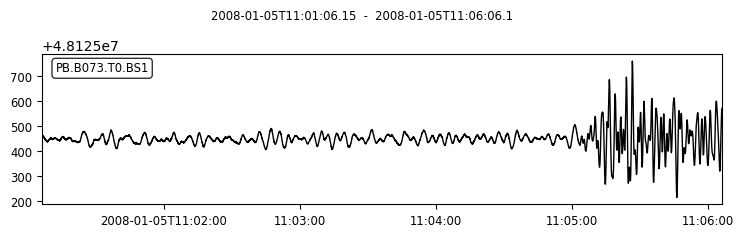

B075


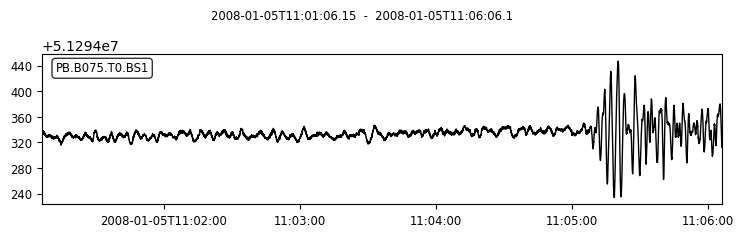

B076


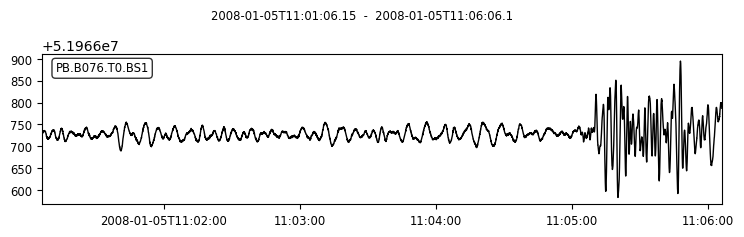

B078


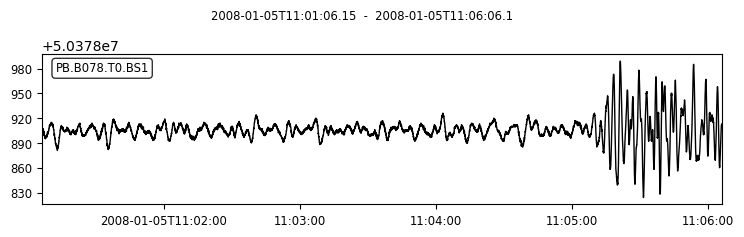

B079


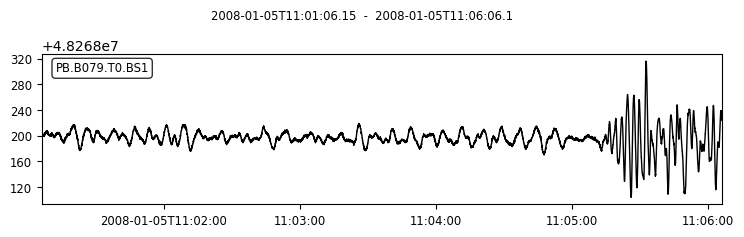

B081
3 B081 BS1 not found
3 B081 BS2 not found
3 B081 BS3 not found
3 B081 BS4 not found
B082


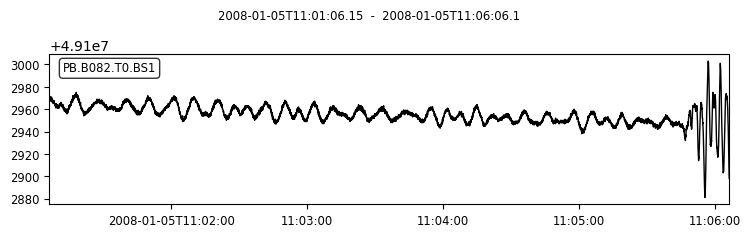

B084
3 B084 BS1 not found
3 B084 BS2 not found
3 B084 BS3 not found
3 B084 BS4 not found
B086
3 B086 BS1 not found
3 B086 BS2 not found
3 B086 BS3 not found
3 B086 BS4 not found
B087


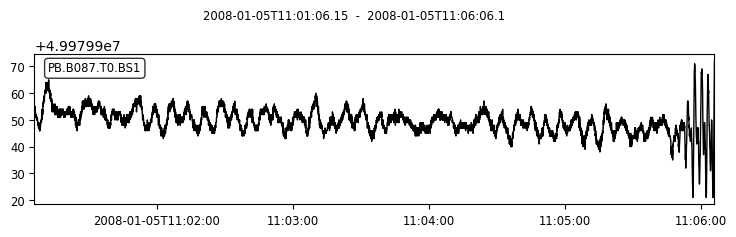

B088


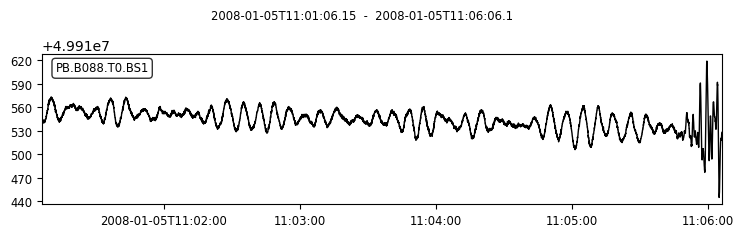

B089


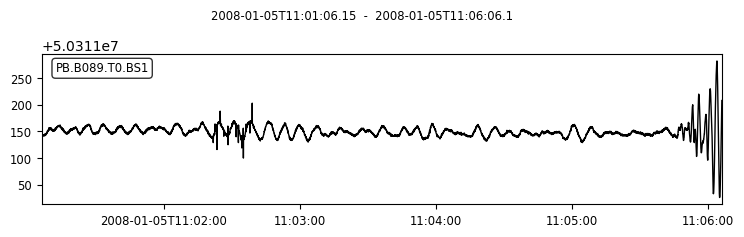

B093


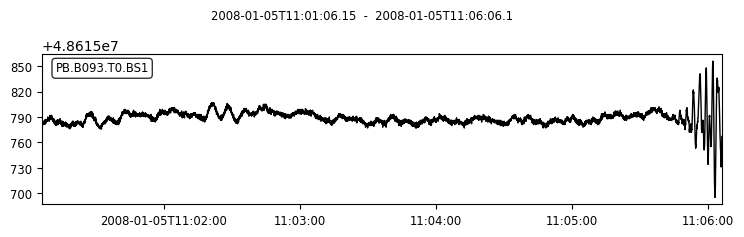

B201
3 B201 BS1 not found
3 B201 BS2 not found
3 B201 BS3 not found
3 B201 BS4 not found
B202
3 B202 BS1 not found
3 B202 BS2 not found
3 B202 BS3 not found
3 B202 BS4 not found
B203
3 B203 BS1 not found
3 B203 BS2 not found
3 B203 BS3 not found
3 B203 BS4 not found
B204
3 B204 BS1 not found
3 B204 BS2 not found
3 B204 BS3 not found
3 B204 BS4 not found
B205
3 B205 BS1 not found
3 B205 BS2 not found
3 B205 BS3 not found
3 B205 BS4 not found
B206
3 B206 BS1 not found
3 B206 BS2 not found
3 B206 BS3 not found
3 B206 BS4 not found
B207
3 B207 BS1 not found
3 B207 BS2 not found
3 B207 BS3 not found
3 B207 BS4 not found
B208
3 B208 BS1 not found
3 B208 BS2 not found
3 B208 BS3 not found
3 B208 BS4 not found
B900


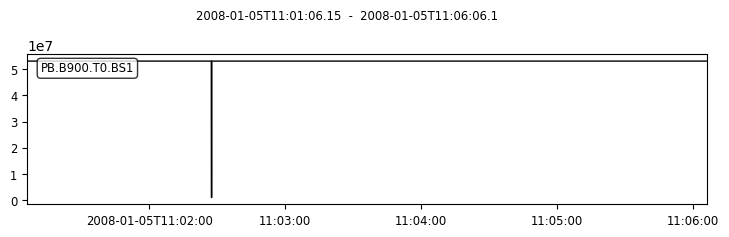

B901


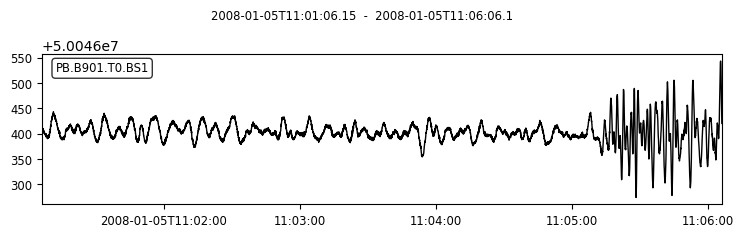

B916
3 B916 BS1 not found
3 B916 BS2 not found
3 B916 BS3 not found
3 B916 BS4 not found
B917
3 B917 BS1 not found
3 B917 BS2 not found
3 B917 BS3 not found
3 B917 BS4 not found
B918
3 B918 BS1 not found
3 B918 BS2 not found
3 B918 BS3 not found
3 B918 BS4 not found
B921
3 B921 BS1 not found
3 B921 BS2 not found
3 B921 BS3 not found
3 B921 BS4 not found
B926


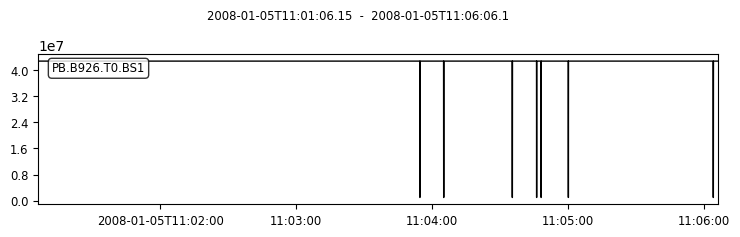

B927


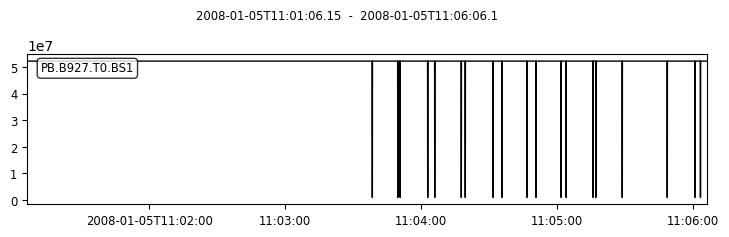

B928
3 B928 BS1 not found
3 B928 BS2 not found
3 B928 BS3 not found
3 B928 BS4 not found
B933
3 B933 BS1 not found
3 B933 BS2 not found
3 B933 BS3 not found
3 B933 BS4 not found
B934
3 B934 BS1 not found
3 B934 BS2 not found
3 B934 BS3 not found
3 B934 BS4 not found
B935
3 B935 BS1 not found
3 B935 BS2 not found
3 B935 BS3 not found
3 B935 BS4 not found
B941
3 B941 BS1 not found
3 B941 BS2 not found
3 B941 BS3 not found
3 B941 BS4 not found
B943
3 B943 BS1 not found
3 B943 BS2 not found
3 B943 BS3 not found
3 B943 BS4 not found
B944
3 B944 BS1 not found
3 B944 BS2 not found
3 B944 BS3 not found
3 B944 BS4 not found
B946
3 B946 BS1 not found
3 B946 BS2 not found
3 B946 BS3 not found
3 B946 BS4 not found
B950
3 B950 BS1 not found
3 B950 BS2 not found
3 B950 BS3 not found
3 B950 BS4 not found
-----------------------------------------
Earthquake 5/8
2005-06-17T06:21:42.590Z
B001
4 B001 BS1 not found
4 B001 BS2 not found
4 B001 BS3 not found
4 B001 BS4 not found
B003
4 B003 BS1 not found
4 

In [6]:
# I then started looping through my list of earthquakes, and putting together the origin
# times for each one as the variable 'ot' in UTCDateTime format. stime and etime are the 
# start and end times of the data I want to pull from IRIS, so I made my stimes the origin
# times of the earthquakes, and the etimes five minutes after the origin.

for idx in range(len(earthquakes)):
    print('-----------------------------------------')
    print('Earthquake ' + str(idx+1) + '/' + str(len(mags)))
#     ot = str(ot_yr[idx]) + '-' + str(ot_mo[idx]) + '-' + str(ot_day[idx]) + 'T' + str(ot_hr[idx]) + ':' + str(ot_min[idx]) + ':' + str(ot_sec[idx])
    ot = origin_times[idx]
    print(ot)
    stime = UTCDateTime(ot)
#     print(ot)
    etime = stime + 5.*60.
#     print(stime)
#     print(etime)
    
    # I then looped through my stations. All of the stations I want are in the 'PB' network,
    # and the data has the location 'T0'. This information you'll probably have to look up on
    # the IRIS Metadata Aggregator website. 
    
    for sta in stas:
        net = 'PB'
        sta = sta
        loc = 'T0'
        print(sta)
        
        # My final loop was through my four channels so I could write individual miniSEED data
        # files for each channel.
        
        for chan in chans:
            chan = chan
            # print(chan)
            
            # I used this try-except condition so I didn't get errors if a station didn't have 
            # data for the time window I was looking at.
            
            try:
                
                # I use the function get_waveforms to get the data from the client (IRIS), and
                # read it into an obpsy stream object using the network, stations, etc. info
                # that I collected earlier. I printed some stats to make sure things were working.
                # Then I wrote the stream into a miniSEED data file and saved it onto my laptop.
                
                st = client.get_waveforms(net, sta, loc, chan, stime, etime)
                if chan == 'BS1':
                    st.plot()
                
                # Create folder for the event
                # if fix_dups:
                #     cut_ot = ot[:13]
                # else:
                #     cut_ot = ot[:10]
                
#                 eq_sta_save_dir = '/Users/sydneydybing/StrainProject/2024/strain_data/raw/' + str(cut_ot) + '_M' + str(mags[idx]) + '/' + str(sta) + '/'
# #                 print(eq_sta_save_dir)
#                 if os.path.isdir(eq_sta_save_dir):
#                     pass
#                 else:
#                     os.makedirs(eq_sta_save_dir)
                
#                 st.write(eq_sta_save_dir + chan + '.mseed', format = 'MSEED')
            
            # If that didn't work, my code prints out the station name and the earthquake number
            # (a piece of information in the original earthquakes CSV that just identifies the
            # event), and the phrase "not found" so I could tell what didn't work.
            
            except:
                print(idx, sta, chan, "not found")
                continue